In [2]:
import sys
import os
import importlib
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# Add the current_measurements directory to the path
current_measurements_path = os.path.join(os.path.dirname(os.getcwd()), 'current_measurements')
if current_measurements_path not in sys.path:
    sys.path.append(current_measurements_path)

import src_correlation_measurement
importlib.reload(src_correlation_measurement)
from src_correlation_measurement import (RampPopulationShotsMeasurement, PopulationShotsBase, PopulationShotsTimeSweepBase, RampOscillationShotsMeasurement,
                                         generate_ramp_population_shots_filename, generate_population_shots_filename,
                                         generate_oscillation_population_shots_filename, generate_ramp_oscillation_population_shots_filename,
                                         generate_ramp_beamsplitter_correlations_filename)

# Import from src_current_measurement_simulations
import src.src_singleshot_measurement
importlib.reload(src.src_singleshot_measurement)
from src.src_singleshot_measurement import Singleshot_2Q_Measurement, generate_singleshot_2Q_filename

import src_correlation_simulation
importlib.reload(src_correlation_simulation)
from src_correlation_simulation import CorrelationSimulation


import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation

### Q2-Q4 Adiabatic Ramp

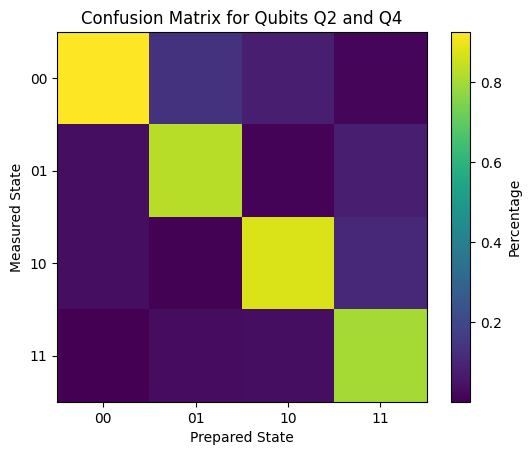

In [2]:
# Q2-Q4 adiabatic ramp

singleshot_filename = generate_singleshot_2Q_filename('2025', '08', '01', '18', '52', '44')
singleshot_measurement = Singleshot_2Q_Measurement(singleshot_filename, 'Q2', 'Q4')
singleshot_measurement.plot_confusion_matrix()

reaodut_indices = [1,3]
# singleshot_measurement_dict = {(0,1): singleshot_measurement}
singleshot_measurement_dict = {(1,3): singleshot_measurement}

In [3]:
filename = generate_ramp_population_shots_filename('2025', '08', '01', '17', '13', '05')

measurement = RampPopulationShotsMeasurement(filename, readout_indices, singleshot_measurement_dict)

population_shots = measurement.get_population_shots()
print(population_shots.shape)

population_average = measurement.get_population_average()
print(population_average)

NameError: name 'readout_indices' is not defined

In [ ]:
average_of_products = np.mean(population_shots[0,:] * population_shots[1,:])

print(f'Sum of products: {average_of_products}')

print(f'covariance: {average_of_products - population_average[0] * population_average[1]}')

Sum of products: 0.032
covariance: -0.144396


In [ ]:
# Extract individual sequences
x = population_shots[0, :]  # qubit 1 outcomes
y = population_shots[1, :]  # qubit 2 outcomes

# 1. Means
mean_x = np.mean(x)
mean_y = np.mean(y)

# 2. Standard deviations
std_x = np.std(x)
std_y = np.std(y)

# 3. Expectation of product (n1 * n2)
mean_xy = np.mean(x * y)

# 4. Covariance
cov_xy = mean_xy - mean_x * mean_y

# 5. Correlation
if std_x > 0 and std_y > 0:
    corr_xy = cov_xy / (std_x * std_y)
else:
    corr_xy = 0  # Or np.nan if you'd prefer to indicate undefined

# Print results
print(f"<n1> = {mean_x}")
print(f"<n2> = {mean_y}")
print(f"Standard deviation n1 = {std_x}")
print(f"Standard deviation n2 = {std_y}")
print(f"Cov(n1, n2) = {cov_xy}")
print(f"Corr(n1, n2) = {corr_xy}")

<n1> = 0.422
<n2> = 0.418
Standard deviation n1 = 0.4938785275753544
Standard deviation n2 = 0.4932301693935601
Cov(n1, n2) = -0.144396
Corr(n1, n2) = -0.5927688656243517


### Q1-Q4 product states

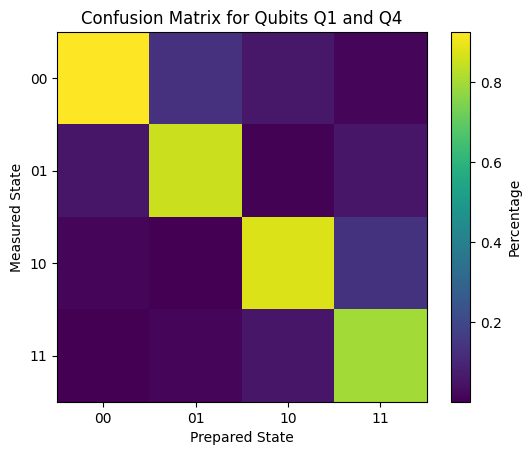

In [4]:
# Q2-Q4 adiabatic ramp

singleshot_filename = generate_singleshot_2Q_filename('2025', '08', '02', '09', '51', '20')
singleshot_measurement = Singleshot_2Q_Measurement(singleshot_filename, 'Q1', 'Q4')
singleshot_measurement.plot_confusion_matrix()

singleshot_measurement_dict = {(0,3): singleshot_measurement}

In [ ]:
filename = generate_population_shots_filename('2025', '08', '02', '10', '55', '22') # |0>(|0> + |1>)
filename = generate_population_shots_filename('2025', '08', '02', '10', '55', '57') # (|0> + |1>)(|0> + |1>)

measurement = PopulationShotsBase(filename, singleshot_measurement_dict)

population_shots = measurement.get_population_shots()

population_average = measurement.get_population_average()

counts = measurement.get_counts()

counts_corrected = measurement.get_counts_corrected()

measurement.plot_counts(corrected=True)

I
Q
Qubit_Readout_List
angle
confusion_matrix
counts
population_shots
readout_list
threshold


KeyError: (0, 3)

### Q2-Q4 Swaps

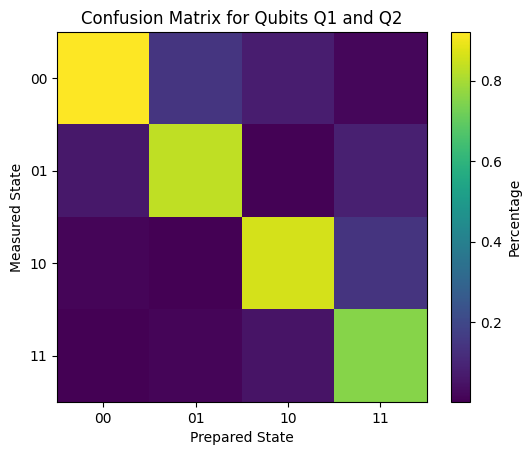

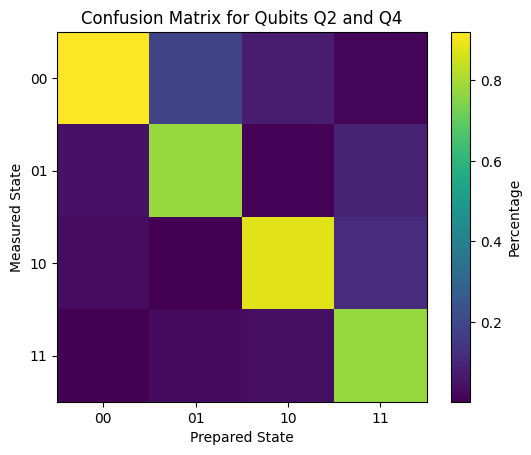

In [37]:
# Q2-Q4 adiabatic ramp

singleshot_filename_dict = {}
singleshot_measurement_dict = {}

singleshot_filename_dict[(0,1)] = generate_singleshot_2Q_filename('2025', '08', '03', '13', '48', '13')
singleshot_filename_dict[(1,3)] = generate_singleshot_2Q_filename('2025', '08', '02', '13', '04', '03')

for pair in singleshot_filename_dict:

    singleshot_filename = singleshot_filename_dict[pair]
    singleshot_measurement = Singleshot_2Q_Measurement(singleshot_filename, f'Q{pair[0]+1}', f'Q{pair[1]+1}')
    singleshot_measurement.plot_confusion_matrix()

    singleshot_measurement_dict[pair] = singleshot_measurement

(2, 201, 5000)


c:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\correlation_measurements\src_correlation_measurement.py:250: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


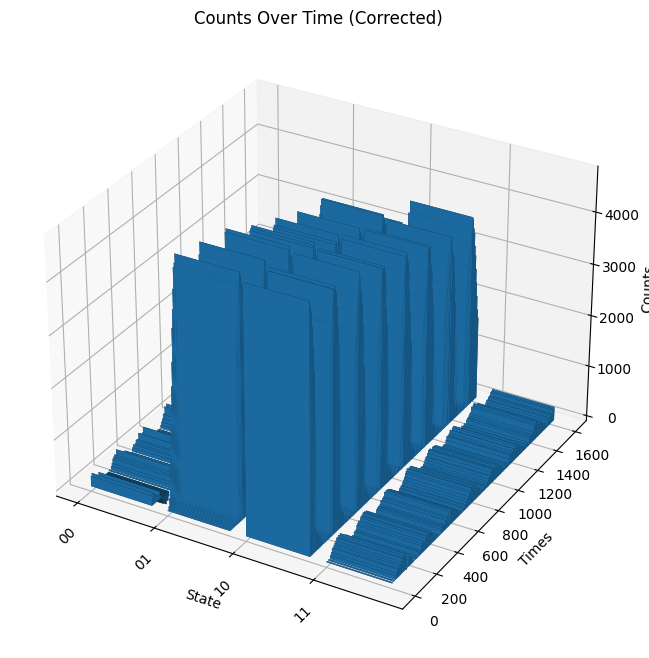

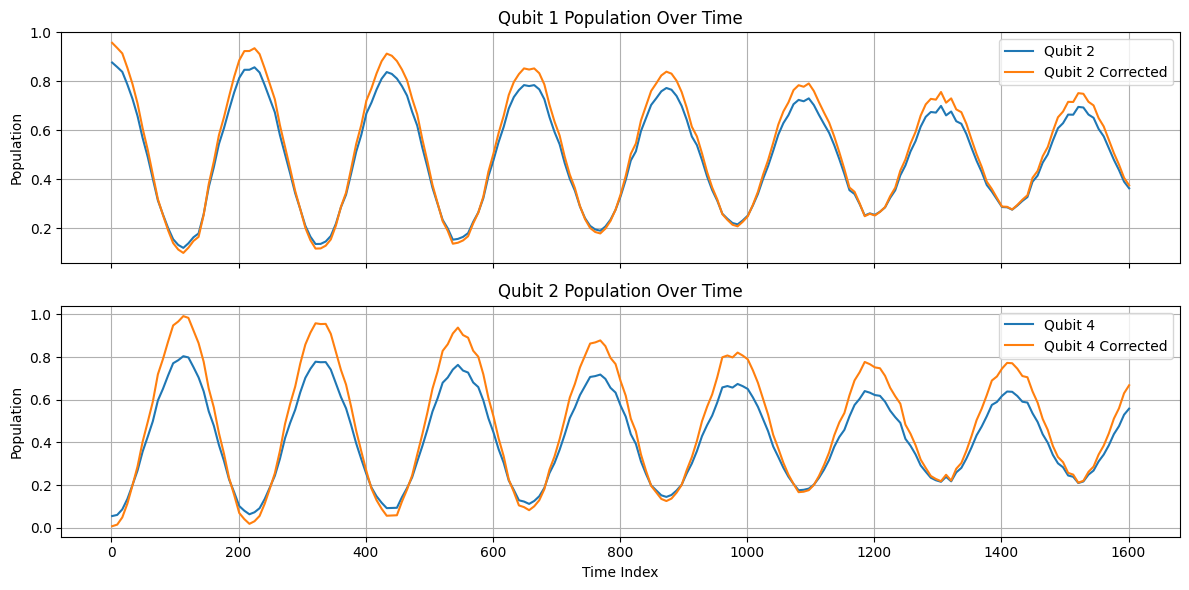

In [6]:
filename = generate_oscillation_population_shots_filename('2025', '08', '02', '14', '33', '14') # swaps
filename = generate_oscillation_population_shots_filename('2025', '08', '02', '17', '37', '55') # swaps

measurement = PopulationShotsTimeSweepBase(filename, singleshot_measurement_dict)

population_shots = measurement.get_population_shots()
print(population_shots.shape)

population_average = measurement.get_population_average()
# print(population_average)

counts = measurement.get_counts()
# print(counts)

counts_corrected = measurement.get_counts_corrected()


measurement.plot_counts(corrected=True)

measurement.plot_population_over_time(both=True)



In [7]:
counts = measurement.get_counts()


time_index = 0
print(counts[:,time_index])

average_1 = (counts[2, time_index] + counts[3, time_index]) / np.sum(counts[:, time_index])
average_2 = (counts[1, time_index] + counts[3, time_index]) / np.sum(counts[:, time_index])
print(average_1)
print(average_2)

variance_1 = average_1 * (1 - average_1)

print('variance')
print(variance_1)

# variance, two different ways
population_shots = measurement.get_population_shots()

print(np.mean(np.power(population_shots[0, :, :] - average_1, 2), axis=-1)[time_index])
print(np.power(measurement.get_standard_deviation()[:, time_index], 2))

# covariance
print('covariance')

print(np.mean(population_shots[0, :, :]*population_shots[1, :, :], axis=-1)[time_index] - average_1 * average_2)

print(counts[3,time_index] / np.sum(counts[:, time_index]) - average_1 * average_2)

print(measurement.get_covariance()[0])

[ 532.   83. 4192.  193.]
0.877
0.0552
variance
0.107871
0.10787099999999998
[0.107871   0.05215296]
covariance
-0.009810399999999997
-0.009810399999999997
-0.009810399999999997


In [8]:
# compare to simulation

population_data = measurement.get_population_corrected()
standard_deviation_data = measurement.get_standard_deviation_corrected()
covariance_data = measurement.get_covariance_corrected()

In [9]:
# craate simulation data
importlib.reload(src_correlation_simulation)
from src_correlation_simulation import CorrelationSimulation

num_levels = 2

J = 2.3 * 2 * np.pi
U = 180 * 2 * np.pi
detuning = 0

T1 = 100  # 40 microseconds
T2 = 10  # 5 microseconds

initial_state = qt.basis([num_levels]*2, [1,0])  # |0> state

times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

print(times)

simulation = CorrelationSimulation(num_levels, initial_state, J, U, detuning, T1=T1, T2=T2, times=simulation_times)
print(len(simulation.states))
simulation.run_simulation()
print(len(simulation.states))


population_simulation = simulation.get_population_average()
standard_deviation_simulation = simulation.get_standard_deviation()
covariance_simulation = simulation.get_covariance()


simulation.hamiltonian


[1.000e-03 9.000e-03 1.700e-02 2.500e-02 3.300e-02 4.100e-02 4.900e-02
 5.700e-02 6.500e-02 7.300e-02 8.100e-02 8.900e-02 9.700e-02 1.050e-01
 1.130e-01 1.210e-01 1.290e-01 1.370e-01 1.450e-01 1.530e-01 1.610e-01
 1.690e-01 1.770e-01 1.850e-01 1.930e-01 2.010e-01 2.090e-01 2.170e-01
 2.250e-01 2.330e-01 2.410e-01 2.490e-01 2.570e-01 2.650e-01 2.730e-01
 2.810e-01 2.890e-01 2.970e-01 3.050e-01 3.130e-01 3.210e-01 3.290e-01
 3.370e-01 3.450e-01 3.530e-01 3.610e-01 3.690e-01 3.770e-01 3.850e-01
 3.930e-01 4.010e-01 4.090e-01 4.170e-01 4.250e-01 4.330e-01 4.410e-01
 4.490e-01 4.570e-01 4.650e-01 4.730e-01 4.810e-01 4.890e-01 4.970e-01
 5.050e-01 5.130e-01 5.210e-01 5.290e-01 5.370e-01 5.450e-01 5.530e-01
 5.610e-01 5.690e-01 5.770e-01 5.850e-01 5.930e-01 6.010e-01 6.090e-01
 6.170e-01 6.250e-01 6.330e-01 6.410e-01 6.490e-01 6.570e-01 6.650e-01
 6.730e-01 6.810e-01 6.890e-01 6.970e-01 7.050e-01 7.130e-01 7.210e-01
 7.290e-01 7.370e-01 7.450e-01 7.530e-01 7.610e-01 7.690e-01 7.770e-01
 7.850

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.          0.          0.          0.        ]
 [ 0.          0.         14.45132621  0.        ]
 [ 0.         14.45132621  0.          0.        ]
 [ 0.          0.          0.          0.        ]]

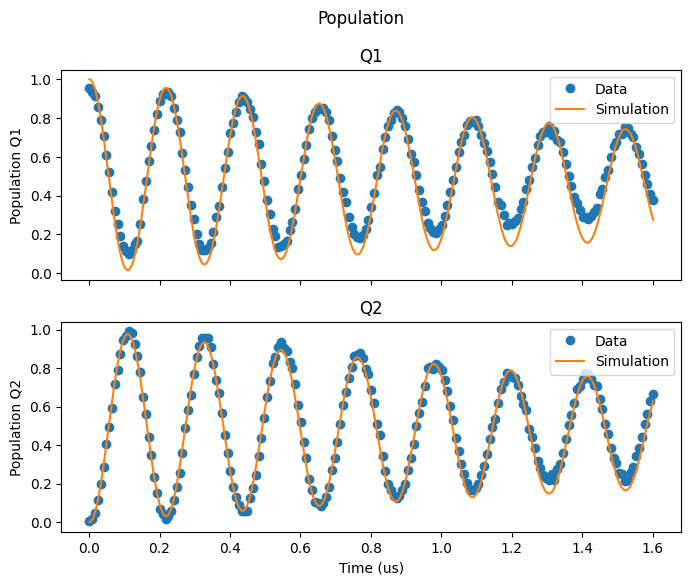

In [10]:
# populations

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for i in range(2):
    axs[i].plot(times, population_data[i,:], 'o', label='Data')
    axs[i].plot(simulation_times, population_simulation[i,:], '-', label='Simulation')
    axs[i].set_ylabel(f'Population Q{i+1}')
    axs[i].legend()
    axs[i].set_title(f'Q{i+1}')

axs[1].set_xlabel('Time (us)')

plt.suptitle('Population')
plt.show()

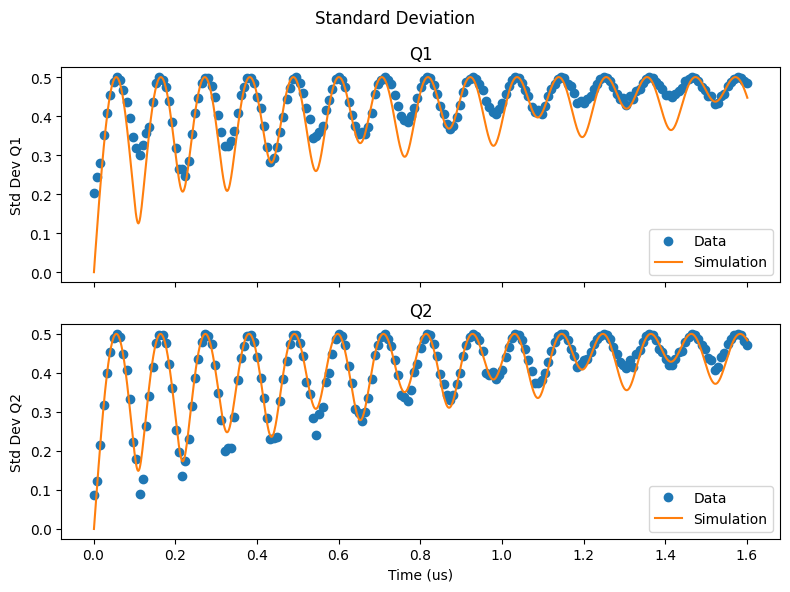

In [11]:
# Plot standard deviations

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axs[0].plot(times, standard_deviation_data[0], 'o', label='Data')
axs[0].plot(simulation_times, standard_deviation_simulation[0], '-', label='Simulation')
axs[0].set_title('Q1')
axs[0].set_ylabel('Std Dev Q1')
axs[0].legend()

axs[1].plot(times, standard_deviation_data[1], 'o', label='Data')
axs[1].plot(simulation_times, standard_deviation_simulation[1], '-', label='Simulation')
axs[1].set_title('Q2')
axs[1].set_ylabel('Std Dev Q2')
axs[1].legend()

axs[1].set_xlabel('Time (us)')

plt.suptitle('Standard Deviation')
plt.tight_layout()
plt.show()

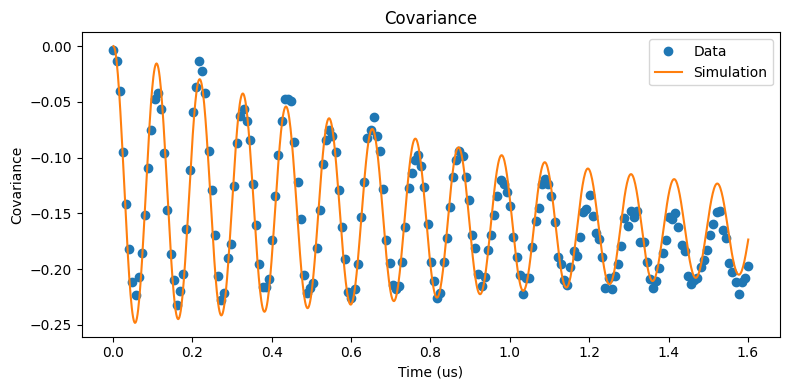

In [12]:
# Plot covariance: data vs simulation

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(times, covariance_data, 'o', label='Data')
ax.plot(simulation_times, covariance_simulation, '-', label='Simulation')
ax.set_ylabel('Covariance')
ax.set_xlabel('Time (us)')
ax.legend()

plt.title('Covariance')
plt.tight_layout()
plt.show()


### 08/03/25
### 08/08/25

(2, 101, 4000)


c:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\correlation_measurements\src_correlation_measurement.py:250: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


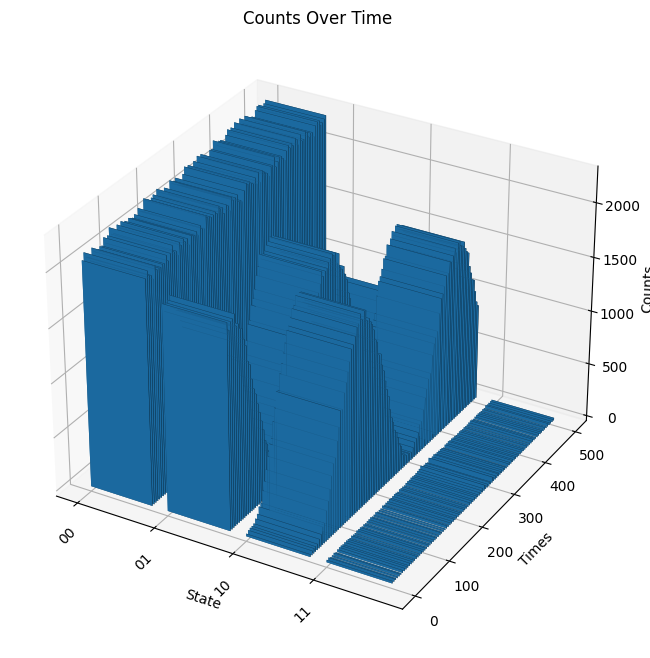

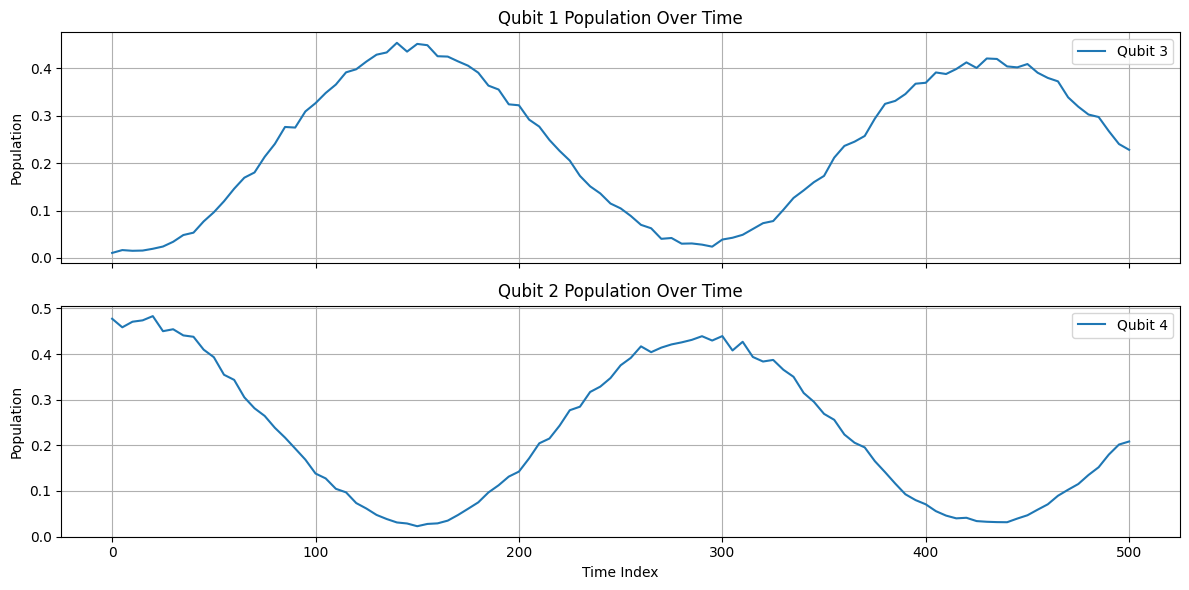

In [104]:
# look at ramp then swaps

importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '14', '20', '54') # swaps, readout Q1-Q2
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '14', '24', '42') # swaps, readout Q2-Q4

# simpler initial state
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '15', '05', '57') # swaps, readout Q1-Q2`
# filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '14', '58', '33') # swaps, readout Q2-Q4`

# prepare 4 directly instead of B state
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '15', '17', '42') # swaps, readout Q1-Q2`

# all 4 qubits ramp with preparing Q1 directly
# filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '15', '30', '18') # swaps, readout Q1-Q2`

# prepare Q2, ramp Q2 onto Q3, jump Q2 onto Q1 and readout Q1-Q2
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '06', '16', '32', '16') # swaps, readout Q1-Q2`

# 8/5/25 
# prepare Q4, ramp Q2 onto Q4, jump Q2 onto Q1 and readout Q1-Q2
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '08', '15', '35', '23') # swaps, readout Q1-Q2`
filename = generate_ramp_oscillation_population_shots_filename('2025', '08', '08', '15', '38', '35') # swaps, readout Q3-Q4`



measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)

population_shots = measurement.get_population_shots()
print(population_shots.shape)

population_average = measurement.get_population_average()
# print(population_average)

counts = measurement.get_counts()
# print(counts)

# counts_corrected = measurement.get_counts_corrected()


measurement.plot_counts()

measurement.plot_population_over_time()


# compare to simulation

# population_data = measurement.get_population_corrected()
population_data = measurement.get_population_average()

# standard_deviation_data = measurement.get_standard_deviation_corrected()
standard_deviation_data = measurement.get_standard_deviation()

# covariance_data = measurement.get_covariance_corrected()
covariance_data = measurement.get_covariance()

readout_qubits = measurement.get_readout_qubits()

times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)


In [105]:
# triangle lattice eigenstates

state = 'B'

num_levels = 2
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

T1 = 200  # 40 microseconds
T2 = 10  # 5 microseconds

# use the times from the measurement and convert to microseconds
times = np.linspace(0, 1, 101)  # Time in microseconds

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'CD':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '0011'

    J = [-6.260000941439563, -5.899999931111843, -5.949999601217552]
    J_parallel = [-7.250000551906229, -7.6500004022320764]
    initial_detunings = [0.384504078712431, 0.09072611481765762, -0.20715438956821963, -0.26680254059262587]
elif state == 'BD':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '0101'

    J = [-39.331282832603534, -37.06898088863868, -37.38838075345022]
    J_parallel = [-45.55392879232946, -48.06372984582205]
    initial_detunings = [2.416169215327486, 0.5711553702615348, -1.3058535838147889, -1.6784808558931188]

elif state == 'BC':
    psi0 = -3
    num_particles = 2
    psi0_bitstring = '0110'

    J = [-39.362892207009956, -37.3440749877249, -37.392105048201365]
    J_parallel = [-45.521209291724986, -48.74037912832882]
    initial_detunings = [2.445986651069131, 0.607136101590656, -1.9544818788022733, -1.6815363507092163]


elif state == 'D':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '0001'

    J = [2 * 2 * np.pi]*3
    J_parallel = [J[0]]*2

    measurement_J = J.copy()
    measurement_J_parallel = J_parallel.copy()

    
elif state == 'A':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '1000'

    J = [-6.26, -5.9, -5.949999999999999]
    J_parallel = [-7.25, -7.65]
    initial_detunings = [0.3845041450858568, 0.09072648008244362, -0.20715429937997465, -0.26680238576971]
    scale_factor = 0.8
    psi0_angles = [3.141592653589793, 0.0, 3.141592653589793, 0.0]

elif state == 'B':
    psi0 = 1
    num_particles = 1
    psi0_bitstring = '0100'

print(f'num_particles: {num_particles}')


print(f'J: {J}')

current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)

print(f'J: {current_correlation_simulation.J}')

psi0 = current_correlation_simulation.psi0

print(readout_qubits)
readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
other_indices = [i for i in range(num_qubits) if i not in readout_indices]

psi0_reduced = qt.ptrace(psi0, other_indices)
psi0_reduced = qt.Qobj(psi0_reduced, dims=[[2,2],[2,2]])

# add a phase between the qubits
# Add a phase between the qubits using numpy's matrix exponential

phase = -np.pi / 2 - np.pi / 8 + np.pi/2  # example phase value
# phase = -np.pi / 4

U_phase = np.array([[1, 0, 0, 0],
                         [0, np.exp(1j * phase), 0, 0],
                         [0, 0, np.exp(-1j * phase), 0],
                         [0, 0, 0, 1]])
U_phase = qt.Qobj(U_phase, dims=[[2,2],[2,2]])

psi0_reduced = U_phase * psi0_reduced * U_phase.dag()

# # two qubit pauli operators
x, y, z, I = qt.sigmax(), qt.sigmay(), qt.sigmaz(), qt.qeye(2)
x_2Q = qt.tensor(x, x) + qt.tensor(y, y)
y_2Q = qt.tensor(x, y) - qt.tensor(y, x)
z_2Q = qt.tensor(z, I) - qt.tensor(I, z)

print(f'x: {(psi0_reduced * x_2Q).tr().real}')
print(f'y: {(psi0_reduced * y_2Q).tr().real}')
print(f'z: {(psi0_reduced * z_2Q).tr().real}')


num_particles: 1
J: [-39.33274002 -37.07079331 -37.38495258]
J: [-39.33274002 -37.07079331 -37.38495258]
[3, 4]
x: -0.28584375219677377
y: 0.2858437521967738
z: -0.914063390887258


In [114]:
# create simulation data
importlib.reload(src_correlation_simulation)
from src_correlation_simulation import CorrelationSimulation

num_levels = 2

J = 1.8 * 2 * np.pi
U = 180 * 2 * np.pi
detuning = 0

T1 = 100  # 40 microseconds
T2 = 10  # 5 microseconds

theta = 0
phi = 0

target_state = np.cos(theta/2)*qt.basis([num_levels]*2, [1,0]) + np.sin(theta/2)*np.exp(1j*phi)*qt.basis([num_levels]*2, [0,1])
target_state = target_state.unit()

# assume we create the initial state with fidelity f
f = 1
f = 1
target_state_rho = target_state*target_state.dag()

error_state_1 = qt.basis([num_levels]*2, [0,0])
error_state_rho_1 = error_state_1*error_state_1.dag()

error_state_2 = qt.basis([num_levels]*2, [0,1])
error_state_rho_2 = error_state_2*error_state_2.dag()

error_state_3 = qt.basis([num_levels]*2, [1,0])
error_state_rho_3 = error_state_3*error_state_3.dag()


initial_state = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1


# instead initial state might be a maximally mixed state since Q1 and Q4 were entangled, but we're swapping Q1 and Q2
# product state of maximally mixed state on Q2 and vacuum state on Q1
# mixed state might be mixed with some bias towards |0>, 

p1 = 0.5

# Maximally mixed state for two qubits
maximally_mixed_state = qt.Qobj(np.diag([1-p1, p1]), dims=[[num_levels], [num_levels]])
vacuum_state = qt.basis(num_levels, 0)
vacuum_state_rho = vacuum_state*vacuum_state.dag()

initial_state = qt.tensor([vacuum_state_rho, maximally_mixed_state])

# use eigenstates
# initial_state = psi0_reduced


times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points


simulation = CorrelationSimulation(num_levels, initial_state, J, U, detuning, T1=T1, T2=T2, times=simulation_times)
simulation.run_simulation()


population_simulation = simulation.get_population_average()
standard_deviation_simulation = simulation.get_standard_deviation()
covariance_simulation = simulation.get_covariance()


simulation.hamiltonian
initial_state

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

In [115]:
# ### compare to other simulation class

# # for this example we ramp Q4 onto Q2 then jump Q2 onto Q1, so initial state is a |+> state between Q2 and Q4

# # phase = np.pi/2
# phase = 0
# initial_state = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,0,1])
# initial_state = qt.basis([num_levels]*4, [0,0,1,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,0,0])
# initial_state = initial_state.unit()


# # for this example we ramp Q3 onto Q2 then jump Q2 onto Q1, so initial state is a |+> state between Q2 and Q3
# phase = 0
# initial_state = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])
# initial_state = initial_state.unit()


# current_correlation_simulation.psi0 = initial_state


# current_correlation_simulation.run_simulation(uncoupled=True)

# population_simulation = current_correlation_simulation.get_population_average()
# standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
# covariance_simulation = current_correlation_simulation.get_covariance()

# current_correlation_simulation.psi0

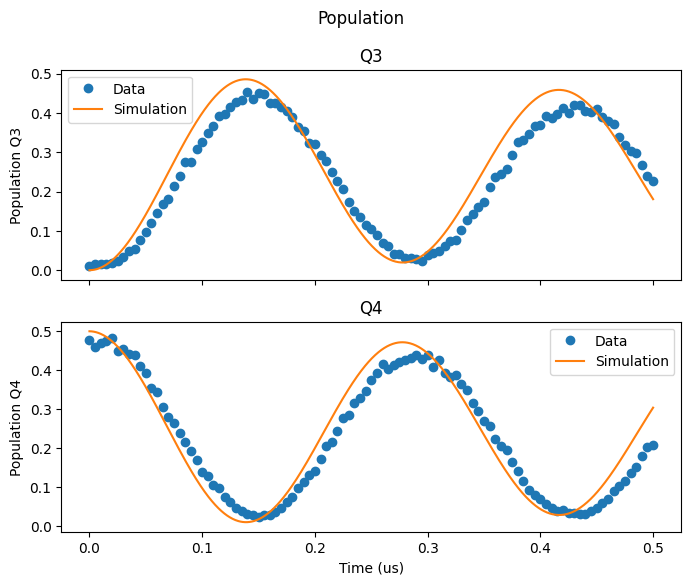

In [116]:
# populations

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for i in range(2):
    axs[i].plot(times, population_data[i,:], 'o', label='Data')
    axs[i].plot(simulation_times, population_simulation[i,:], '-', label='Simulation')
    axs[i].set_ylabel(f'Population Q{readout_qubits[i]}')
    axs[i].legend()
    axs[i].set_title(f'Q{readout_qubits[i]}')

axs[1].set_xlabel('Time (us)')

plt.suptitle('Population')
plt.show()

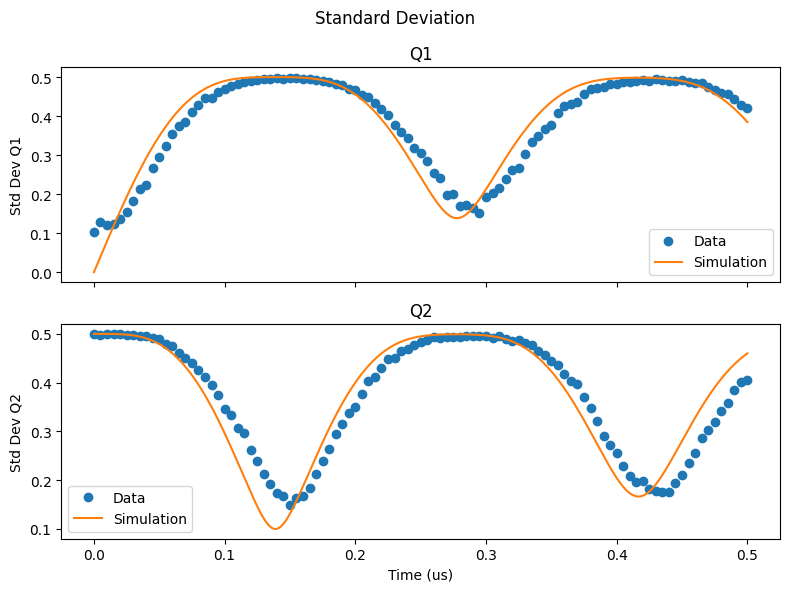

In [117]:
# Plot standard deviations

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axs[0].plot(times, standard_deviation_data[0], 'o', label='Data')
axs[0].plot(simulation_times, standard_deviation_simulation[0], '-', label='Simulation')
axs[0].set_title('Q1')
axs[0].set_ylabel('Std Dev Q1')
axs[0].legend()

axs[1].plot(times, standard_deviation_data[1], 'o', label='Data')
axs[1].plot(simulation_times, standard_deviation_simulation[1], '-', label='Simulation')
axs[1].set_title('Q2')
axs[1].set_ylabel('Std Dev Q2')
axs[1].legend()

axs[1].set_xlabel('Time (us)')

plt.suptitle('Standard Deviation')
plt.tight_layout()
plt.show()

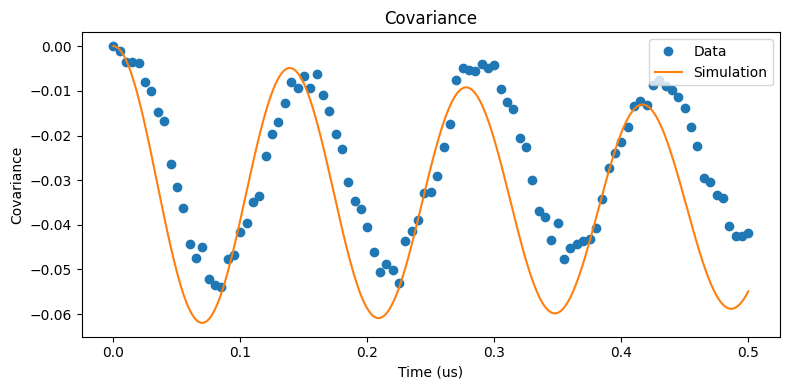

In [118]:
# Plot covariance: data vs simulation

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(times, covariance_data, 'o', label='Data')
try:
    ax.plot(simulation_times, covariance_simulation[0,1], '-', label='Simulation')
except:
    ax.plot(simulation_times, covariance_simulation, '-', label='Simulation')
ax.set_ylabel('Covariance')
ax.set_xlabel('Time (us)')
ax.legend()

plt.title('Covariance')
plt.tight_layout()
plt.show()


# 2. Analyze Ramp-Swap Experiments

In [5]:
def create_psi0_with_angles(psi0, current_measurement_simulation, num_levels, num_qubits, num_particles, angles, bitstring):
    """
    Create a psi0 string with given angles and bitstring.
    If bitstring is None, it will be generated based on num_particles.
    """

    if bitstring is not None:

        if len(bitstring) != num_qubits:
            raise ValueError(f"psi0_bitstring must have length {num_qubits}, got {len(bitstring)}.")
        if bitstring.count('1') != num_particles:
            raise ValueError(f"psi0_bitstring must have exactly {num_particles} '1's, got {bitstring.count('1')}.")

        if isinstance(psi0, int):
            two_particle_eigenstates = current_measurement_simulation.get_particle_number_to_eigenstate_dict()[2]
            target_state = two_particle_eigenstates[psi0]
        elif isinstance(psi0, qt.Qobj):
            target_state = psi0

        one_particle_eigenstates = current_measurement_simulation.get_particle_number_to_eigenstate_dict()[1]

        # try prepare |0001> but actually get |0>|0>|theta_1, phi_1>|theta_2, phi_2>
        # |theta_i, phi_i> = cos(theta_i/2) |0> + exp(i*phi_i) sin(theta_i/2) |1>

        # |0000> -> vacuum state
        # |0001> -> current_measurement_simulation.get_particle_number_to_eigenstate()[1][-1]
        # |0010> -> current_measurement_simulation.get_particle_number_to_eigenstate()[1][-2]
        # |0011> -> current_measurement_simulation.get_particle_number_to_eigenstate()[2][-1]

        theta_1, phi_1, theta_2, phi_2 = angles

        

        prepared_state = 0

        if num_particles == 2:

            # find indices of two 1's in psi0_bitstring
            indices = [i for i in range(len(bitstring)) if bitstring[i] == '1']

            index_1, index_2 = indices
            negative_index_1 = -(num_qubits - index_1)
            negative_index_2 = -(num_qubits - index_2)


            prepared_state += np.cos(theta_1/2)*np.cos(theta_2/2) * qt.basis([num_levels] * num_qubits, [0, 0, 0, 0])  # |0000> 
            prepared_state += np.cos(theta_1/2)*np.sin(theta_2/2) * np.exp(1j*phi_2) * one_particle_eigenstates[negative_index_1]  # |0001> 
            prepared_state += np.sin(theta_1/2)*np.cos(theta_2/2) * np.exp(1j*phi_1) * one_particle_eigenstates[negative_index_2]  # |0010> 
            prepared_state += np.sin(theta_1/2)*np.sin(theta_2/2) * np.exp(1j*(phi_1 + phi_2)) * target_state  # |0011> 

            # print(f'first single particle state index: {negative_index_2}')
            # print(f'second single particle state index: {negative_index_1}')
            # print(f'two particle state index: {eigenstate_index}')

        else:
            eigenstate_index = psi0
            one_particle_eigenstates = current_measurement_simulation.get_particle_number_to_eigenstate_dict()[1]
            two_particle_eigenstates = current_measurement_simulation.get_particle_number_to_eigenstate_dict()[2]

            # try prepare |0001> but actually get |0>|0>|0>|theta, phi>
            # |theta_i, phi_i> = cos(theta_i/2) |0> + exp(i*phi_i) sin(theta_i/2) |1>

            # |0000> -> vacuum state
            # |0001> -> current_measurement_simulation.get_particle_number_to_eigenstate()[1][-1]

            theta, phi, _, _ = angles

            prepared_state = 0
            prepared_state += np.cos(theta/2) * qt.basis([num_levels] * num_qubits, [0, 0, 0, 0])  # |0000> 
            prepared_state += np.sin(theta/2) * np.exp(1j*phi) * one_particle_eigenstates[eigenstate_index]  # |0001> 


    else:
        raise ValueError("If psi0_angles is provided, psi0_bitstring must also be provided.")
    
    return prepared_state

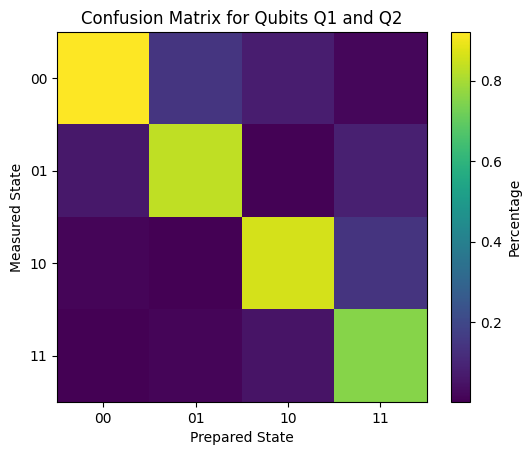

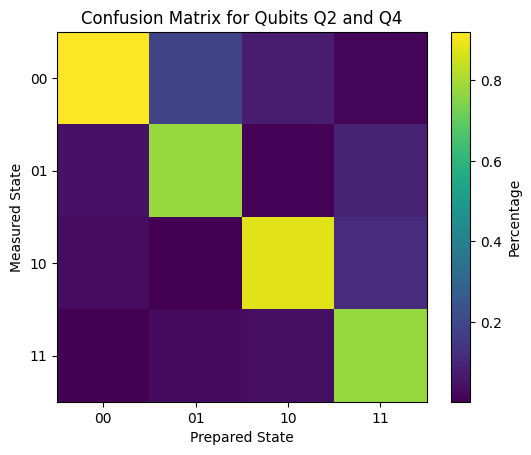

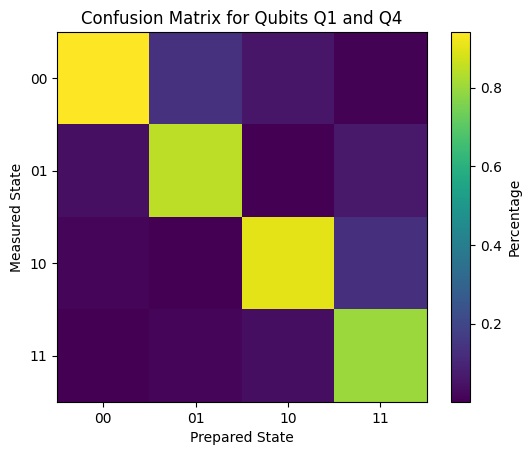

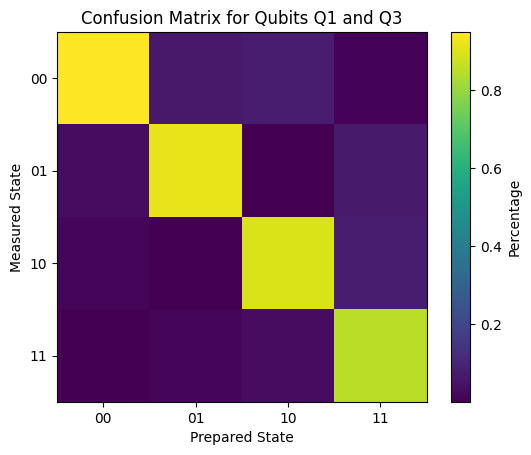

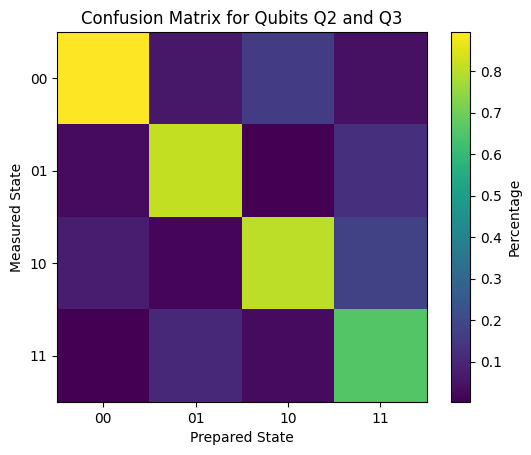

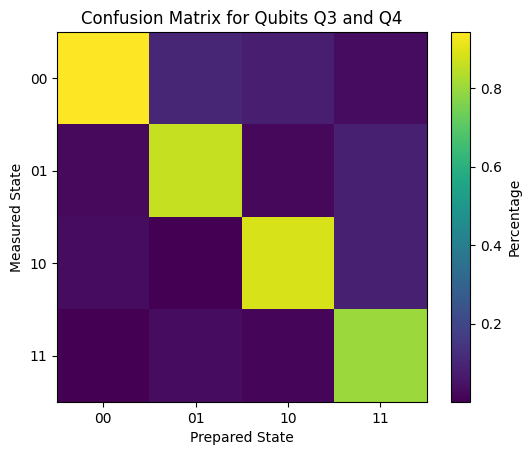

In [6]:
# Q2-Q4 adiabatic ramp

singleshot_filename_dict = {}
singleshot_measurement_dict = {}

singleshot_filename_dict[(0,1)] = generate_singleshot_2Q_filename('2025', '08', '03', '13', '48', '13')
singleshot_filename_dict[(1,3)] = generate_singleshot_2Q_filename('2025', '08', '02', '13', '04', '03')
singleshot_filename_dict[(0,3)] = generate_singleshot_2Q_filename('2025', '08', '03', '17', '44', '32')
singleshot_filename_dict[(0,2)] = generate_singleshot_2Q_filename('2025', '08', '03', '17', '45', '32')
singleshot_filename_dict[(1,2)] = generate_singleshot_2Q_filename('2025', '08', '03', '18', '14', '01')
singleshot_filename_dict[(2,3)] = generate_singleshot_2Q_filename('2025', '08', '08', '16', '11', '23')

for pair in singleshot_filename_dict:

    singleshot_filename = singleshot_filename_dict[pair]
    singleshot_measurement = Singleshot_2Q_Measurement(singleshot_filename, f'Q{pair[0]+1}', f'Q{pair[1]+1}')
    singleshot_measurement.plot_confusion_matrix()

    singleshot_measurement_dict[pair] = singleshot_measurement

In [49]:
# look at ramp then swaps

importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

pair_to_filename = {}

# BC state
# pair_to_filename[(0,1)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '17', '04', '15') # Q1-Q2
# pair_to_filename[(0,2)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '17', '07', '47') # Q1-Q3
# pair_to_filename[(1,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '17', '12', '07') # Q2-Q4
# pair_to_filename[(1,2)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '17', '29', '33') # Q2-Q3
# pair_to_filename[(0,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '17', '34', '31') # Q1-Q4    

# D state
# pair_to_filename[(0,1)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '15', '30', '18') # Q1-Q2
# pair_to_filename[(0,2)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '16', '41', '22') # Q1-Q3
# pair_to_filename[(1,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '16', '53', '42') # Q2-Q4
# pair_to_filename[(1,2)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '03', '16', '57', '24') # Q2-Q3


# 0806 prepare Q2-Q3 in x state
pair_to_filename[(0,1)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '06', '16', '32', '16') # Q1-Q2
pair_to_filename[(2,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '06', '16', '45', '25') # Q3-Q4


# prepare Q1 isolated and Q2-Q3 in x state
pair_to_filename[(0,1)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '06', '17', '00', '06') # Q1-Q2
pair_to_filename[(2,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '06', '17', '03', '33') # Q3-Q4


pair_to_measurement = {}
pair_to_population = {}
pair_to_standard_deviation = {}
pair_to_covariance = {}

for pair in pair_to_filename:
    filename = pair_to_filename[pair]
    measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)
    pair_to_measurement[pair] = measurement


    # measurement.plot_counts(corrected=True)
    # measurement.plot_population_over_time(both=True)


    population_data = measurement.get_population_average()
    # population_data = measurement.get_population_corrected()

    standard_deviation_data = measurement.get_standard_deviation()
    # standard_deviation_data = measurement.get_standard_deviation_corrected()

    covariance_data = measurement.get_covariance()
    # covariance_data = measurement.get_covariance_corrected()

    # readout_qubits = measurement.get_readout_qubits()

    pair_to_population[pair] = population_data
    pair_to_standard_deviation[pair] = standard_deviation_data
    pair_to_covariance[pair] = covariance_data




In [85]:
import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


# triangle lattice eigenstates

state = 'D'

num_levels = 3
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

T1 = 200  # 40 microseconds
T2 = 10  # 5 microseconds

# T1 = None
# T2 = None

# use the times from the measurement and convert to microseconds
times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'CD':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '0011'

    J = [-6.260000941439563, -5.899999931111843, -5.949999601217552]
    J_parallel = [-7.250000551906229, -7.6500004022320764]
    initial_detunings = [0.384504078712431, 0.09072611481765762, -0.20715438956821963, -0.26680254059262587]
elif state == 'BD':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '0101'

    # J = [-39.331282832603534, -37.06898088863868, -37.38838075345022]
    # J_parallel = [-45.55392879232946, -48.06372984582205]
    # initial_detunings = [2.416169215327486, 0.5711553702615348, -1.3058535838147889, -1.6784808558931188]

elif state == 'BC':
    psi0 = -3
    num_particles = 2
    psi0_bitstring = '0110'

    psi0_angles = [3.141592653589793 * 7/8, 0.0, 3.141592653589793 * 7/8, 0.0]


elif state == 'D':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '0001'

    measurement_J = 2 * 2 * np.pi
    measurement_J = measurement_J


    initial_detunings = [0.3845041450858568, 0.09072648008244362, 6, -0.26680238576971]
    
elif state == 'A':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '1000'

    J = [-6.26, -5.9, -5.949999999999999]
    J_parallel = [-7.25, -7.65]
    initial_detunings = [0.3845041450858568, 0.09072648008244362, -0.20715429937997465, -0.26680238576971]
    scale_factor = 0.8
    psi0_angles = [3.141592653589793 * 7/8, 0.0, 3.141592653589793 * 7/8, 0.0]

elif state == 'B':
    psi0 = 1
    num_particles = 1
    psi0_bitstring = '0100'

print(f'num_particles: {num_particles}')




current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)






####################################


### modify initial state
psi0 = current_correlation_simulation.psi0

x_state = True
if x_state:
    phase = 0
    psi0 = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])

    f_1 = 0.9
    f_2 = 1

    target_state = (qt.basis([num_levels]*4, [1,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [1,0,1,0])).unit()
    error_state_1 = (qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])).unit()
    error_state_2 = qt.basis([num_levels]*4, [1,0,0,0])
    error_state_3 = qt.basis([num_levels]*4, [0,0,0,0])

    target_state_rho = target_state*target_state.dag()
    error_state_rho_1 = error_state_1*error_state_1.dag()
    error_state_rho_2 = error_state_2*error_state_2.dag()
    error_state_rho_3 = error_state_3*error_state_3.dag()

    psi0 = f_1*f_2*target_state_rho + (1-f_1)*f_2*error_state_rho_1 + f_1*(1-f_2)*error_state_rho_2 + (1-f_1)*(1-f_2)*error_state_rho_3


add_phase = False
if add_phase:
    readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
    print(f'reaodut_indices: {readout_indices}')

    other_indices = [i for i in range(num_qubits) if i not in readout_indices]

    # psi0_reduced = qt.ptrace(psi0, other_indices)
    # psi0_reduced = qt.Qobj(psi0_reduced, dims=[[num_levels]*2]*2)

    # add a phase between the qubits

    phase = 0

    # two_qubit_annihilation_operators = []
    # two_qubit_annihilation_operators.append(qt.tensor(qt.destroy(num_levels), qt.qeye(num_levels)))
    # two_qubit_annihilation_operators.append(qt.tensor(qt.qeye(num_levels), qt.destroy(num_levels)))

    annihilation_operators = current_correlation_simulation.annihilation_operators
    a1 = annihilation_operators[readout_indices[0]]
    a2 = annihilation_operators[readout_indices[1]]

    # a1, a2 = two_qubit_annihilation_operators

    z1 = (2*a1.dag()*a1 - 1) / 2
    z2 = (2*a2.dag()*a2 - 1) / 2

    x1 = (a1 + a1.dag()) / 2
    x2 = (a2 + a2.dag()) / 2

    y1 = (a1 - a1.dag()) / (2j)
    y2 = (a2 - a2.dag()) / (2j)

    Z_2Q = z1 - z2
    X_2Q = x1*x2 + y1*y2
    y_2Q = x1*y2 - y1*x2

    phase = np.pi/4
    phase = 0
    U_phase = (1j*phase*(z1 - z2)).expm()


    psi0 = U_phase * psi0

    print(f'X: {qt.expect(X_2Q, psi0)}')
    print(f'Y: {qt.expect(y_2Q, psi0)}')
    print(f'Z: {qt.expect(Z_2Q, psi0)}')


imperfect_state = False
mixed = True

if imperfect_state:
    if mixed:
        ### attempt to create a mixed state with the vacuum state/single particle states etc.
        target_state_rho = psi0*psi0.dag()
        f = 0.9
        
        # Count number of '1's in psi0_bitstring
        num_ones = psi0_bitstring.count('1')
        if num_ones == 2:

            eigenstate_particle_number_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()[num_particles]

            ones_indices = [i for i, bit in enumerate(psi0_bitstring) if bit == '1']
            print(f'Indices of 1s in psi0_bitstring: {ones_indices}')

            error_state_1 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_1 = error_state_1*error_state_1.dag()

            error_state_2 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_2 = error_state_2*error_state_2.dag()

            error_state_3 = qt.basis([num_levels]*num_qubits, [0]*num_qubits)
            error_state_rho_3 = error_state_3*error_state_3.dag()

            psi0 = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1

        else:
            print('only implemented for two particle states so far')
    else:
        ### attempt to create a superposition state with the vacuum state/single particle states etc.

        current_correlation_simulation.psi0 = create_psi0_with_angles(psi0, current_correlation_simulation, num_levels, num_qubits, num_particles, psi0_angles, psi0_bitstring)
        

current_correlation_simulation.psi0 = psi0
# print(psi0.tr())
# print((psi0*psi0.dag()).tr())

(psi0*psi0).tr()

num_particles: 1


0.8199999999999996

In [86]:
current_correlation_simulation.run_simulation()

population_simulation = current_correlation_simulation.get_population_average()
standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
covariance_simulation = current_correlation_simulation.get_covariance()
covariance_sum_simulation = current_correlation_simulation.get_covariance_sum()


running simulation
running mesolve


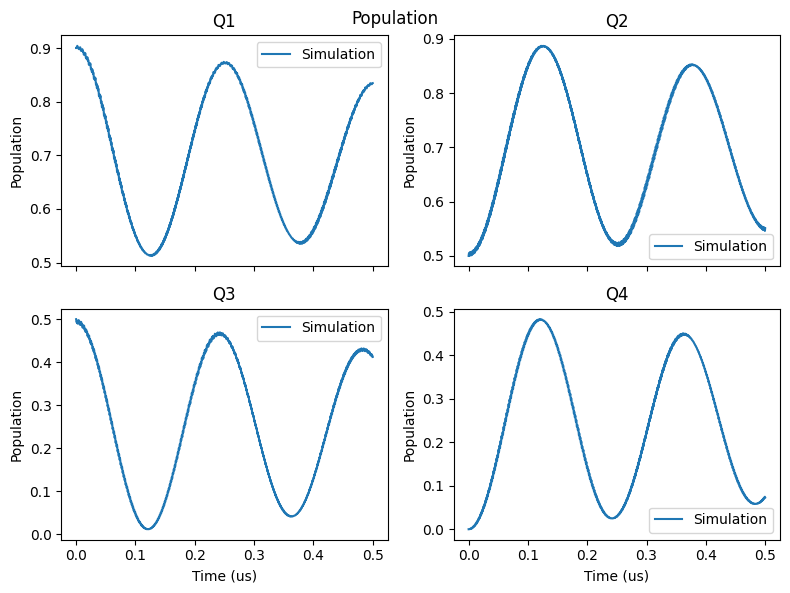

In [87]:
# populations

fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

axs = axs.flatten()

plot_all = False

for i in range(len(axs)):
    if plot_all:
        if i == 0 or i == 1:
            axs[i].plot(times, pair_to_population[(i,2)][0,:], 'o', label='Data')
        else:
            axs[i].plot(times, pair_to_population[(1,i)][1,:], 'o', label='Data')


    axs[i].plot(simulation_times, population_simulation[i,:], '-', label='Simulation')
    axs[i].set_ylabel(f'Population')
    axs[i].legend()
    axs[i].set_title(f'Q{i+1}')

axs[2].set_xlabel('Time (us)')
axs[3].set_xlabel('Time (us)')

plt.tight_layout()

plt.suptitle('Population')
plt.show()


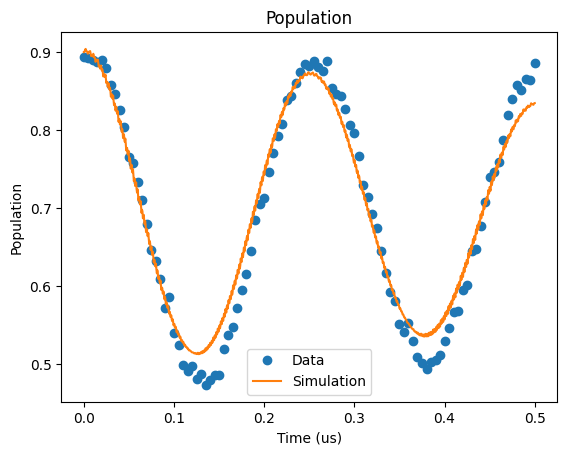

In [89]:
pair = (0,1)
# pair = (2,3)

plt.plot(times, pair_to_population[pair][0,:], 'o', label='Data')
plt.plot(simulation_times, population_simulation[pair[0],:], '-', label='Simulation')

plt.xlabel('Time (us)')
plt.ylabel('Population')

plt.title('Population')
plt.legend()
plt.show()


KeyError: (0, 2)

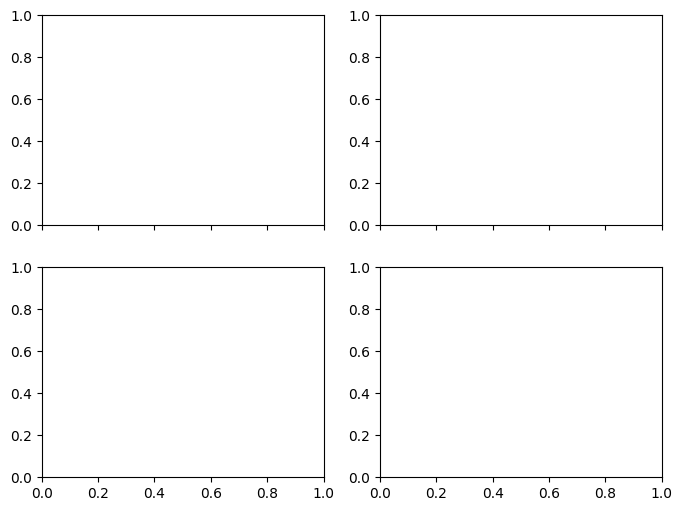

In [144]:
# standard deviations

fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True)

axs = axs.flatten()

for i in range(len(axs)):
    if i == 0 or i == 1:
        axs[i].plot(times, pair_to_standard_deviation[(i,2)][0,:], 'o', label='Data')
    else:
        axs[i].plot(times, pair_to_standard_deviation[(1,i)][1,:], 'o', label='Data')

    axs[i].plot(simulation_times, standard_deviation_simulation[i,:], '-', label='Simulation')
    axs[i].set_ylabel(f'Standard Deviation')
    axs[i].legend()
    axs[i].set_title(f'Q{i+1}')

axs[2].set_xlabel('Time (us)')
axs[3].set_xlabel('Time (us)')

plt.tight_layout()

plt.suptitle('Standard Deviation')
plt.show()


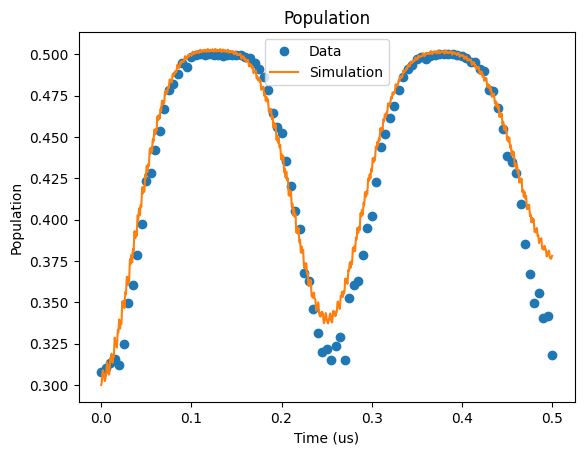

In [91]:
pair = (0,1)
# pair = (2,3)

plt.plot(times, pair_to_standard_deviation[pair][0,:], 'o', label='Data')
plt.plot(simulation_times, standard_deviation_simulation[pair[0],:], '-', label='Simulation')

plt.xlabel('Time (us)')
plt.ylabel('Population')

plt.title('Population')
plt.legend()
plt.show()


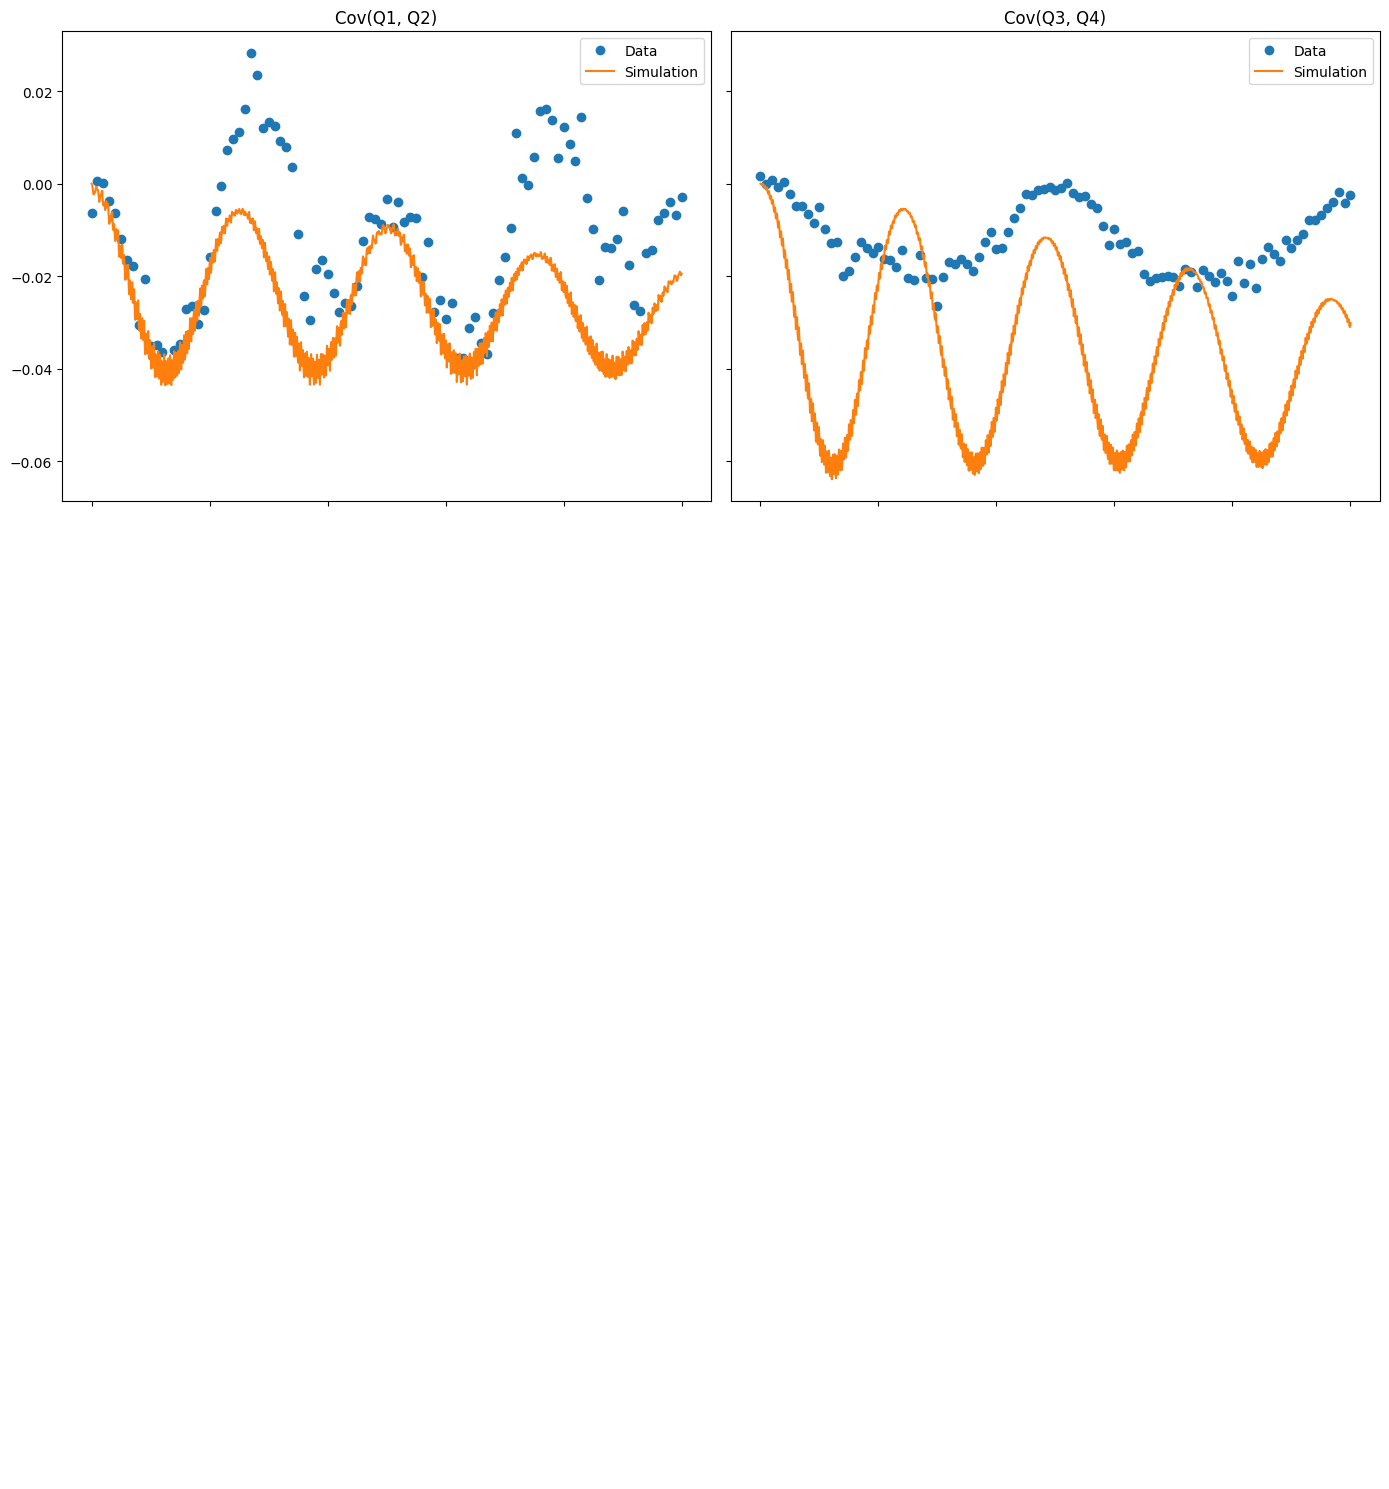

In [92]:
# Calculate total number of subplots (upper triangle, excluding diagonal)
num_plots = 4 * (4 - 1) // 2
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows), sharex=True, sharey=True)
axs = axs.flatten()

plot_idx = 0
for i in range(4):
    for j in range(i + 1, 4):
        pair = (i, j)
        if pair in pair_to_covariance:
            ax = axs[plot_idx]
            ax.plot(times, pair_to_covariance[pair], linestyle='', marker='o', label='Data')
            ax.plot(simulation_times, covariance_simulation[i, j], '-', label='Simulation')
            ax.plot
            ax.set_title(f'Cov(Q{i+1}, Q{j+1})')
            ax.legend()
            plot_idx += 1

# Hide unused axes
for k in range(plot_idx, len(axs)):
    axs[k].axis('off')


plt.tight_layout()
plt.show()

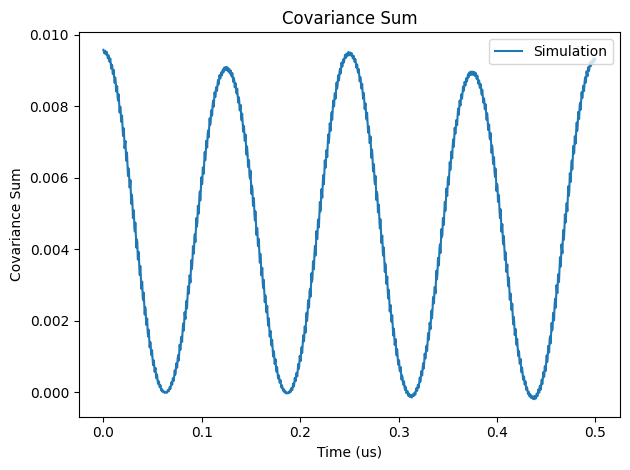

In [ ]:
covariance_sum_data = pair_to_covariance[(0,2)] - pair_to_covariance[(0,3)] - pair_to_covariance[(1,2)] + pair_to_covariance[(1,3)]

plt.plot(times, covariance_sum_data, 'o', label='Data')
plt.plot(simulation_times, covariance_sum_simulation, '-', label='Simulation')
plt.title('Covariance Sum')
plt.ylabel('Covariance Sum')
plt.xlabel('Time (us)')
plt.legend()
plt.tight_layout()
plt.show()

### 8/8/25

In [5]:
# look at ramp then swaps

importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

pair_to_filename = {}


# prepare Q4 and ramp Q2, Q3, Q4 onto resonance, then jump Q1 onto Q2
pair_to_filename[(0,1)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '08', '16', '15', '37') # Q1-Q2
pair_to_filename[(2,3)] = generate_ramp_oscillation_population_shots_filename('2025', '08', '08', '16', '18', '47') # Q3-Q4


pair_to_measurement = {}
pair_to_population = {}
pair_to_standard_deviation = {}
pair_to_covariance = {}

for pair in pair_to_filename:
    filename = pair_to_filename[pair]
    measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)
    pair_to_measurement[pair] = measurement


    # measurement.plot_counts(corrected=True)
    # measurement.plot_population_over_time(both=True)


    # population_data = measurement.get_population_average()
    population_data = measurement.get_population_corrected()

    # standard_deviation_data = measurement.get_standard_deviation()
    standard_deviation_data = measurement.get_standard_deviation_corrected()

    # covariance_data = measurement.get_covariance()
    covariance_data = measurement.get_covariance_corrected()

    # readout_qubits = measurement.get_readout_qubits()

    pair_to_population[pair] = population_data
    pair_to_standard_deviation[pair] = standard_deviation_data
    pair_to_covariance[pair] = covariance_data




KeyError: (0, 1)

In [192]:
import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


# triangle lattice eigenstates

state = 'A'

num_levels = 2
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0



measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

# T1 = 200  # 40 microseconds
# T2 = 10  # 5 microseconds

T1 = None
T2 = None

# use the times from the measurement and convert to microseconds
times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'CD':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '0011'

    J = [-6.260000941439563, -5.899999931111843, -5.949999601217552]
    J_parallel = [-7.250000551906229, -7.6500004022320764]
    initial_detunings = [0.384504078712431, 0.09072611481765762, -0.20715438956821963, -0.26680254059262587]
elif state == 'BD':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '0101'

    # J = [-39.331282832603534, -37.06898088863868, -37.38838075345022]
    # J_parallel = [-45.55392879232946, -48.06372984582205]
    # initial_detunings = [2.416169215327486, 0.5711553702615348, -1.3058535838147889, -1.6784808558931188]

elif state == 'BC':
    psi0 = -3
    num_particles = 2
    psi0_bitstring = '0110'

    psi0_angles = [3.141592653589793 * 7/8, 0.0, 3.141592653589793 * 7/8, 0.0]


elif state == 'D':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '0001'

    measurement_J = 2 * 2 * np.pi
    measurement_J = measurement_J

    
elif state == 'A':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '1000'

    J = [-6.26, -5.9, -5.949999999999999]
    J_parallel = [-7.25, -7.65]
    initial_detunings = [0.3845041450858568, 0.09072648008244362, -0.20715429937997465, -0.26680238576971]
    scale_factor = 0.8
    psi0_angles = [3.141592653589793 * 7/8, 0.0, 3.141592653589793 * 7/8, 0.0]

    initial_detunings = [300*2*np.pi, 0, 0, 0] 


    J = [2.3 * 2 * np.pi] * 3
    J_parallel = [2.3 * 2 * np.pi] * 2
    
    measurement_J = J.copy()
    measurement_J_parallel = J_parallel.copy()


elif state == 'B':
    psi0 = 1
    num_particles = 1
    psi0_bitstring = '0100'



print(f'num_particles: {num_particles}')




current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)






####################################


### modify initial state
psi0 = current_correlation_simulation.psi0

x_state = False
if x_state:
    phase = 0
    psi0 = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])

    f_1 = 0.9
    f_2 = 1

    target_state = (qt.basis([num_levels]*4, [1,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [1,0,1,0])).unit()
    error_state_1 = (qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])).unit()
    error_state_2 = qt.basis([num_levels]*4, [1,0,0,0])
    error_state_3 = qt.basis([num_levels]*4, [0,0,0,0])

    target_state_rho = target_state*target_state.dag()
    error_state_rho_1 = error_state_1*error_state_1.dag()
    error_state_rho_2 = error_state_2*error_state_2.dag()
    error_state_rho_3 = error_state_3*error_state_3.dag()

    psi0 = f_1*f_2*target_state_rho + (1-f_1)*f_2*error_state_rho_1 + f_1*(1-f_2)*error_state_rho_2 + (1-f_1)*(1-f_2)*error_state_rho_3


add_phase = False
if add_phase:
    readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
    print(f'reaodut_indices: {readout_indices}')

    other_indices = [i for i in range(num_qubits) if i not in readout_indices]

    # psi0_reduced = qt.ptrace(psi0, other_indices)
    # psi0_reduced = qt.Qobj(psi0_reduced, dims=[[num_levels]*2]*2)

    # add a phase between the qubits

    phase = 0

    # two_qubit_annihilation_operators = []
    # two_qubit_annihilation_operators.append(qt.tensor(qt.destroy(num_levels), qt.qeye(num_levels)))
    # two_qubit_annihilation_operators.append(qt.tensor(qt.qeye(num_levels), qt.destroy(num_levels)))

    annihilation_operators = current_correlation_simulation.annihilation_operators
    a1 = annihilation_operators[readout_indices[0]]
    a2 = annihilation_operators[readout_indices[1]]

    # a1, a2 = two_qubit_annihilation_operators

    z1 = (2*a1.dag()*a1 - 1) / 2
    z2 = (2*a2.dag()*a2 - 1) / 2

    x1 = (a1 + a1.dag()) / 2
    x2 = (a2 + a2.dag()) / 2

    y1 = (a1 - a1.dag()) / (2j)
    y2 = (a2 - a2.dag()) / (2j)

    Z_2Q = z1 - z2
    X_2Q = x1*x2 + y1*y2
    y_2Q = x1*y2 - y1*x2

    phase = np.pi/4
    phase = 0
    U_phase = (1j*phase*(z1 - z2)).expm()


    psi0 = U_phase * psi0

    print(f'X: {qt.expect(X_2Q, psi0)}')
    print(f'Y: {qt.expect(y_2Q, psi0)}')
    print(f'Z: {qt.expect(Z_2Q, psi0)}')


imperfect_state = False
mixed = False

if imperfect_state:
    if mixed:
        ### attempt to create a mixed state with the vacuum state/single particle states etc.
        target_state_rho = psi0*psi0.dag()
        f = 0.9
        
        # Count number of '1's in psi0_bitstring
        num_ones = psi0_bitstring.count('1')
        if num_ones == 2:

            eigenstate_particle_number_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()[num_particles]

            ones_indices = [i for i, bit in enumerate(psi0_bitstring) if bit == '1']
            print(f'Indices of 1s in psi0_bitstring: {ones_indices}')

            error_state_1 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_1 = error_state_1*error_state_1.dag()

            error_state_2 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_2 = error_state_2*error_state_2.dag()

            error_state_3 = qt.basis([num_levels]*num_qubits, [0]*num_qubits)
            error_state_rho_3 = error_state_3*error_state_3.dag()

            psi0 = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1

        else:
            print('only implemented for two particle states so far')
    else:
        ### attempt to create a superposition state with the vacuum state/single particle states etc.

        current_correlation_simulation.psi0 = create_psi0_with_angles(psi0, current_correlation_simulation, num_levels, num_qubits, num_particles, psi0_angles, psi0_bitstring)
        

current_correlation_simulation.psi0 = psi0
# print(psi0.tr())
# print((psi0*psi0.dag()).tr())

for i in range(num_qubits):
    n_i = current_correlation_simulation.annihilation_operators[i].dag() * current_correlation_simulation.annihilation_operators[i]
    print(f'Q{i+1} population: {qt.expect(n_i, psi0)}')



print(f'coupling')
print(current_correlation_simulation.J_parallel)
current_correlation_simulation.measurement_Hamiltonian

num_particles: 1
Q1 population: 3.8848308593036986e-05
Q2 population: 0.16779011718429532
Q3 population: 0.16779011718429532
Q4 population: 0.6643809173228163
coupling
[14.451326206513047, 14.451326206513047]


Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dia, isherm=True
Qobj data =
[[    0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.        ]
 [    0.         -1759.29188601    14.45132621     0.
     14.45132621     0.             0.             0.
      0.             0.             0.             0.
      0.             0.             0.             0.        ]
 [    0.            14.45132621 -1759.29188601     0.
     14.45132621     0.             0.             0.
     14.45132621     0.             0.             0.
      0.             0.             0.             0.        ]
 [    0.             0.             0.         -3518.58377202
      0.            14.45132621    14.45132621     0.
      0.            14.45132621     0.             0.
      0.             0.             0.  

In [193]:
current_correlation_simulation.run_simulation()

population_simulation = current_correlation_simulation.get_population_average()
standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
covariance_simulation = current_correlation_simulation.get_covariance()
covariance_sum_simulation = current_correlation_simulation.get_covariance_sum()




running simulation
running sesolve


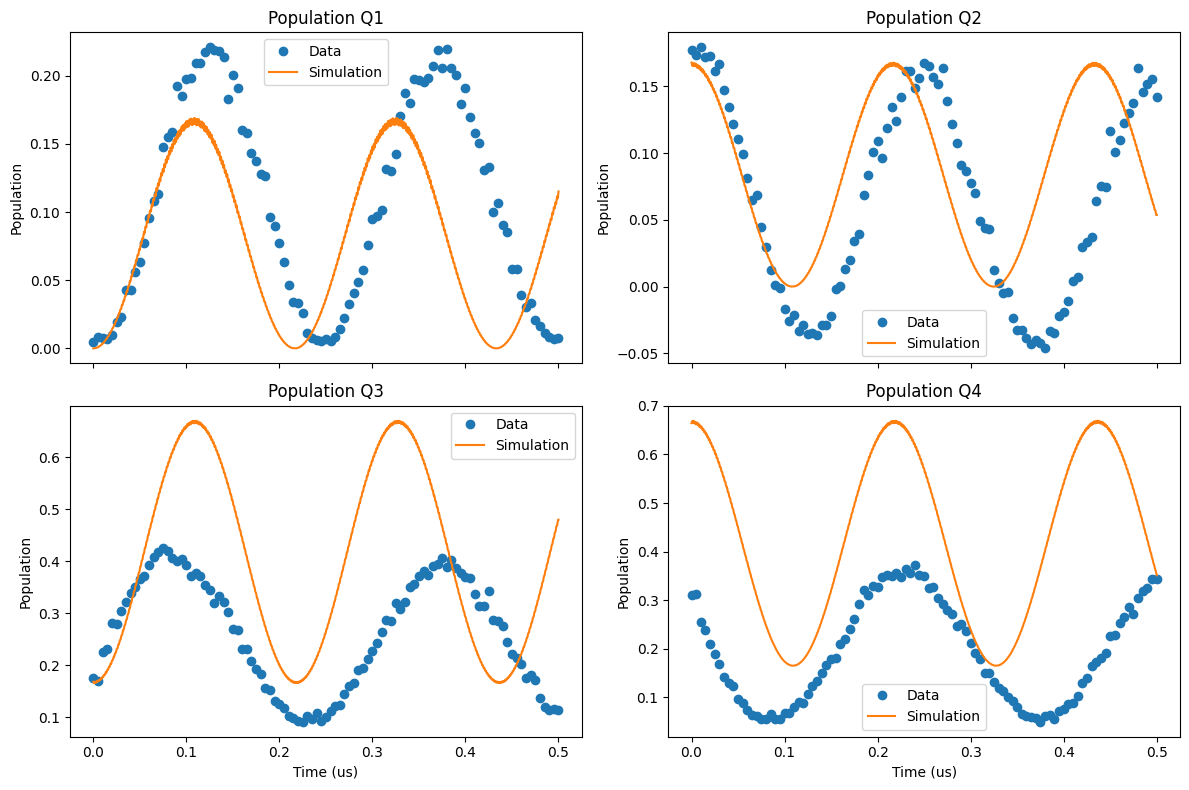

In [194]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']
pairs = [(0, 1), (0, 1), (2, 3), (2, 3)]
data_indices = [0, 1, 0, 1]
sim_indices = [0, 1, 2, 3]

for idx, ax in enumerate(axs.flat):
    pair = pairs[idx]
    data_idx = data_indices[idx]
    sim_idx = sim_indices[idx]
    # Plot data
    ax.plot(times, pair_to_population[pair][data_idx, :], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, population_simulation[sim_idx, :], '-', label='Simulation')
    ax.set_title(f'Population {qubit_labels[sim_idx]}')
    ax.set_ylabel('Population')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')
plt.tight_layout()
plt.show()



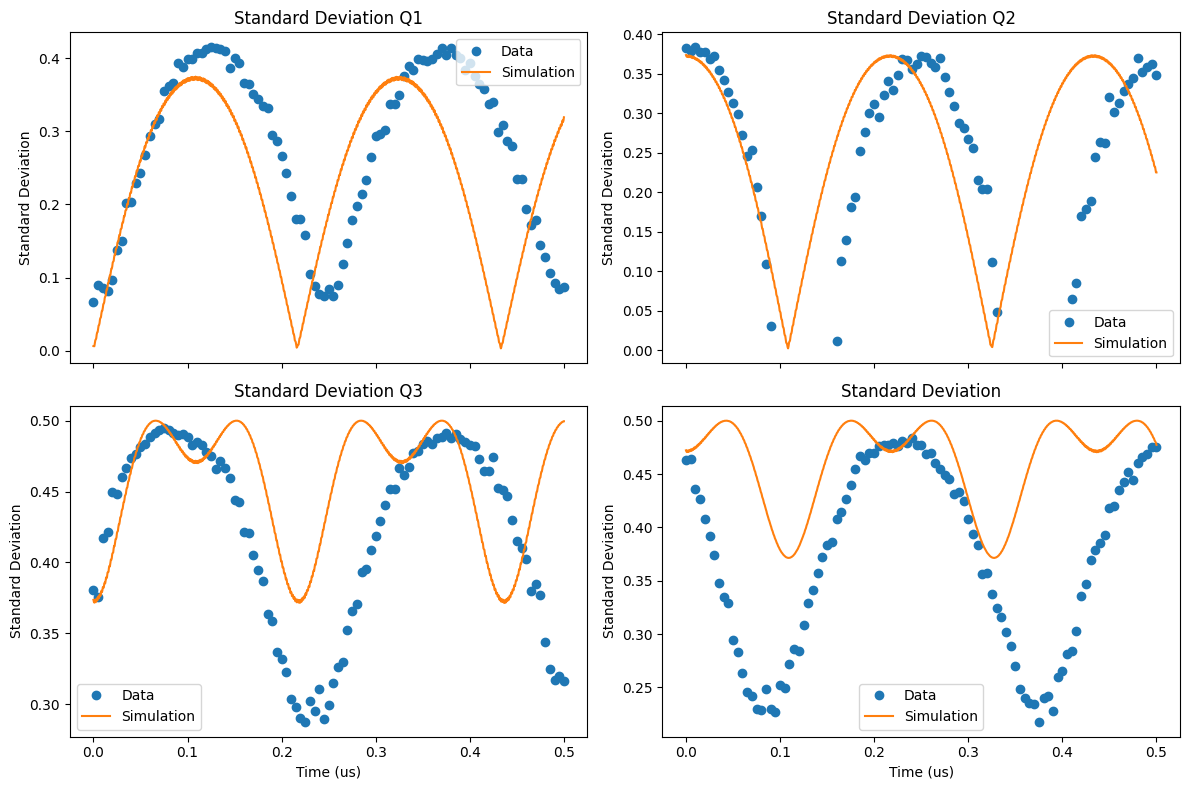

In [197]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']
pairs = [(0, 1), (0, 1), (2, 3), (2, 3)]
data_indices = [0, 1, 0, 1]
sim_indices = [0, 1, 2, 3]

for idx, ax in enumerate(axs.flat):
    pair = pairs[idx]
    data_idx = data_indices[idx]
    sim_idx = sim_indices[idx]
    # Plot data
    ax.plot(times, pair_to_standard_deviation[pair][data_idx, :], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, standard_deviation_simulation[sim_idx, :], '-', label='Simulation')
    ax.set_title(f'Standard Deviation {qubit_labels[sim_idx]}')
    ax.set_ylabel('Standard Deviation')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')
plt.tight_layout()


plt.title('Standard Deviation')
plt.legend()
plt.show()


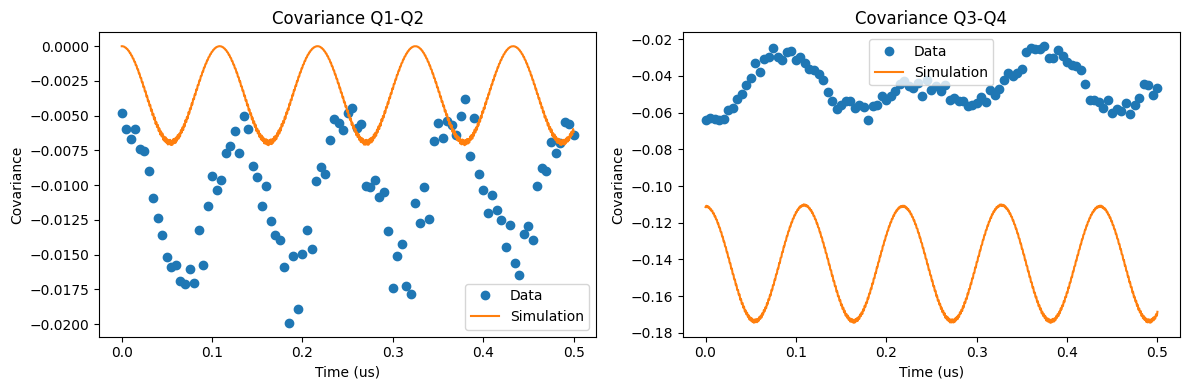

5

In [198]:
## Plot all covariance pairs in pair_to_covariance with both data and simulation

num_pairs = len(pair_to_covariance)
num_cols = 2
num_rows = int(np.ceil(num_pairs / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)
axs = axs.flatten()

for idx, (pair, data_cov) in enumerate(pair_to_covariance.items()):
    ax = axs[idx]
    # Plot data
    ax.plot(times, data_cov, 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, covariance_simulation[pair[0], pair[1]], '-', label='Simulation')
    ax.set_title(f'Covariance Q{pair[0]+1}-Q{pair[1]+1}')
    ax.set_xlabel('Time (us)')
    ax.set_ylabel('Covariance')
    ax.legend()

# Hide unused axes
for k in range(idx + 1, len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()


5




# 2.2.1
Simulations for Q2, Q4 resonance

### 8/12/25

In [119]:
importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

state_to_filename = {}

# ramp Q2, Q4 onto resonance, then jump Q1 onto Q2 and Q3 onto Q4
state_to_filename['Q2'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '16', '22', '46') # Q2
state_to_filename['Q4'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '16', '25', '57') # Q4
state_to_filename['Q1Q4'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '16', '38', '37') # Q4


state_to_measurement = {}
state_to_population = {}
state_to_standard_deviation = {}
state_to_covariance = {}

for state in state_to_filename:
    filename = state_to_filename[state]
    measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)
    state_to_measurement[state] = measurement


    # measurement.plot_counts(corrected=True)
    # measurement.plot_population_over_time(both=True)


    population_data = measurement.get_population_average()
    # population_data = measurement.get_population_corrected()

    standard_deviation_data = measurement.get_standard_deviation()
    # standard_deviation_data = measurement.get_standard_deviation_corrected()

    covariance_data = measurement.get_covariance()
    # covariance_data = measurement.get_covariance_corrected()

    # readout_qubits = measurement.get_readout_qubits()

    state_to_population[state] = population_data
    state_to_standard_deviation[state] = standard_deviation_data
    state_to_covariance[state] = covariance_data



plotting state: Q2


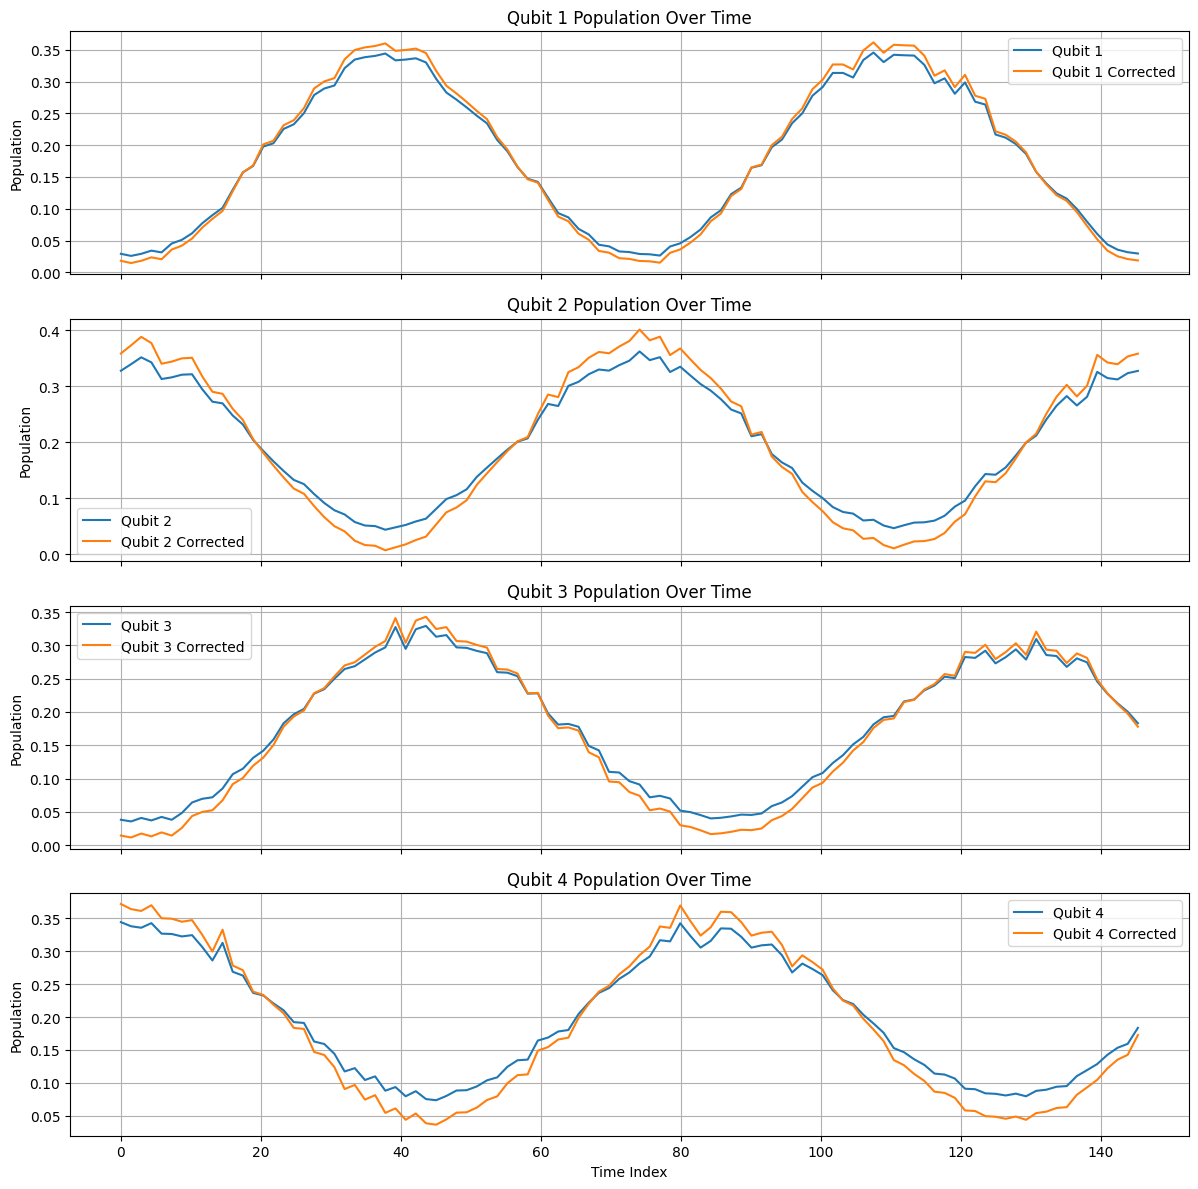

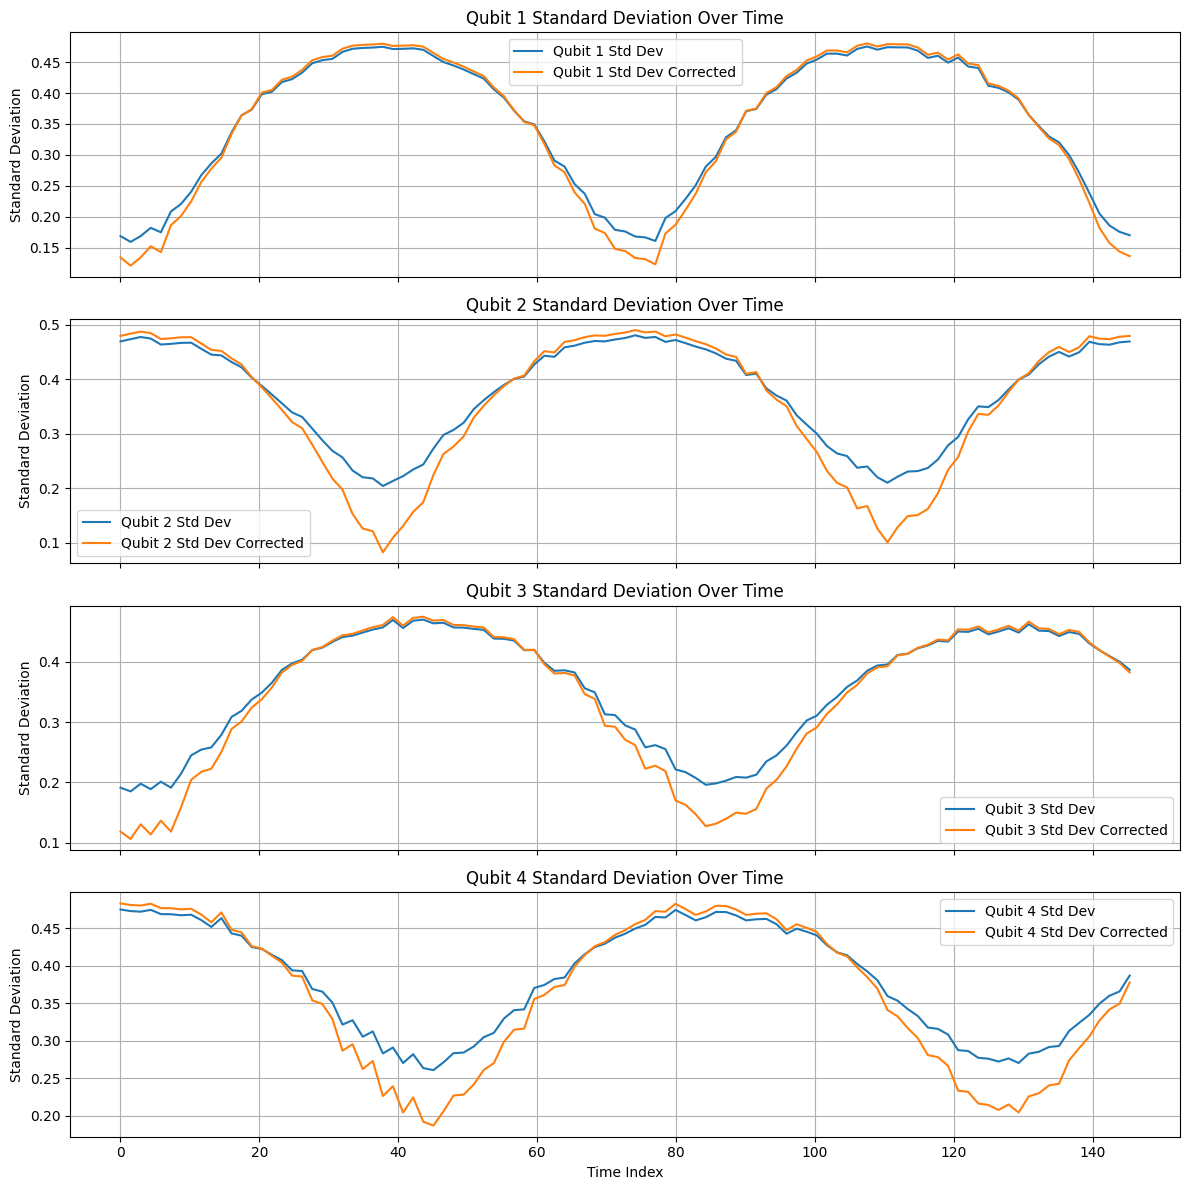

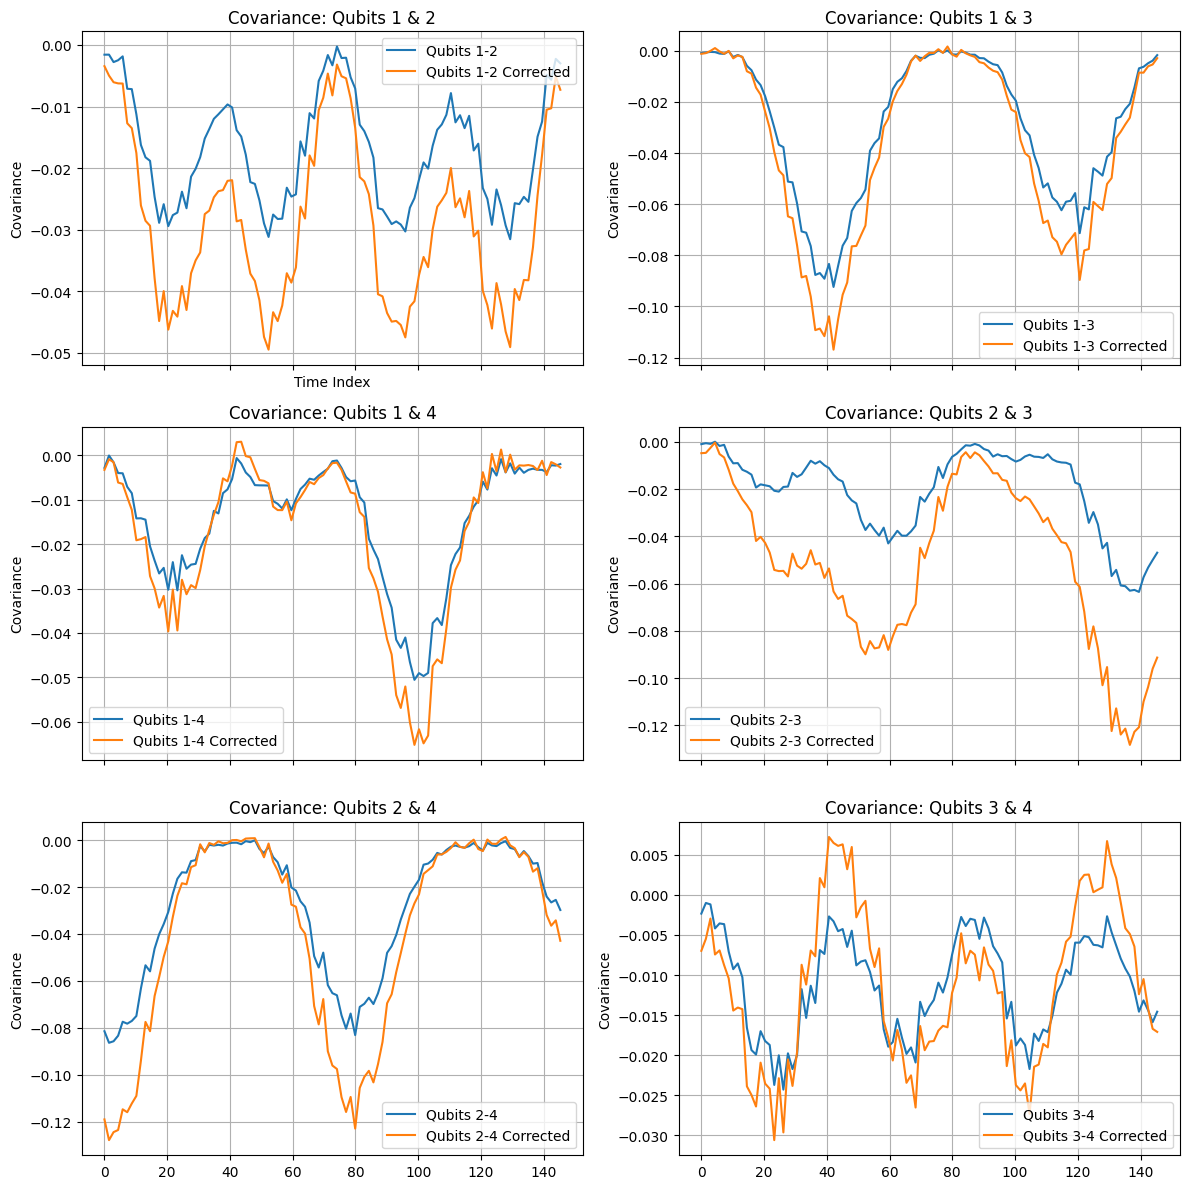

plotting state: Q4


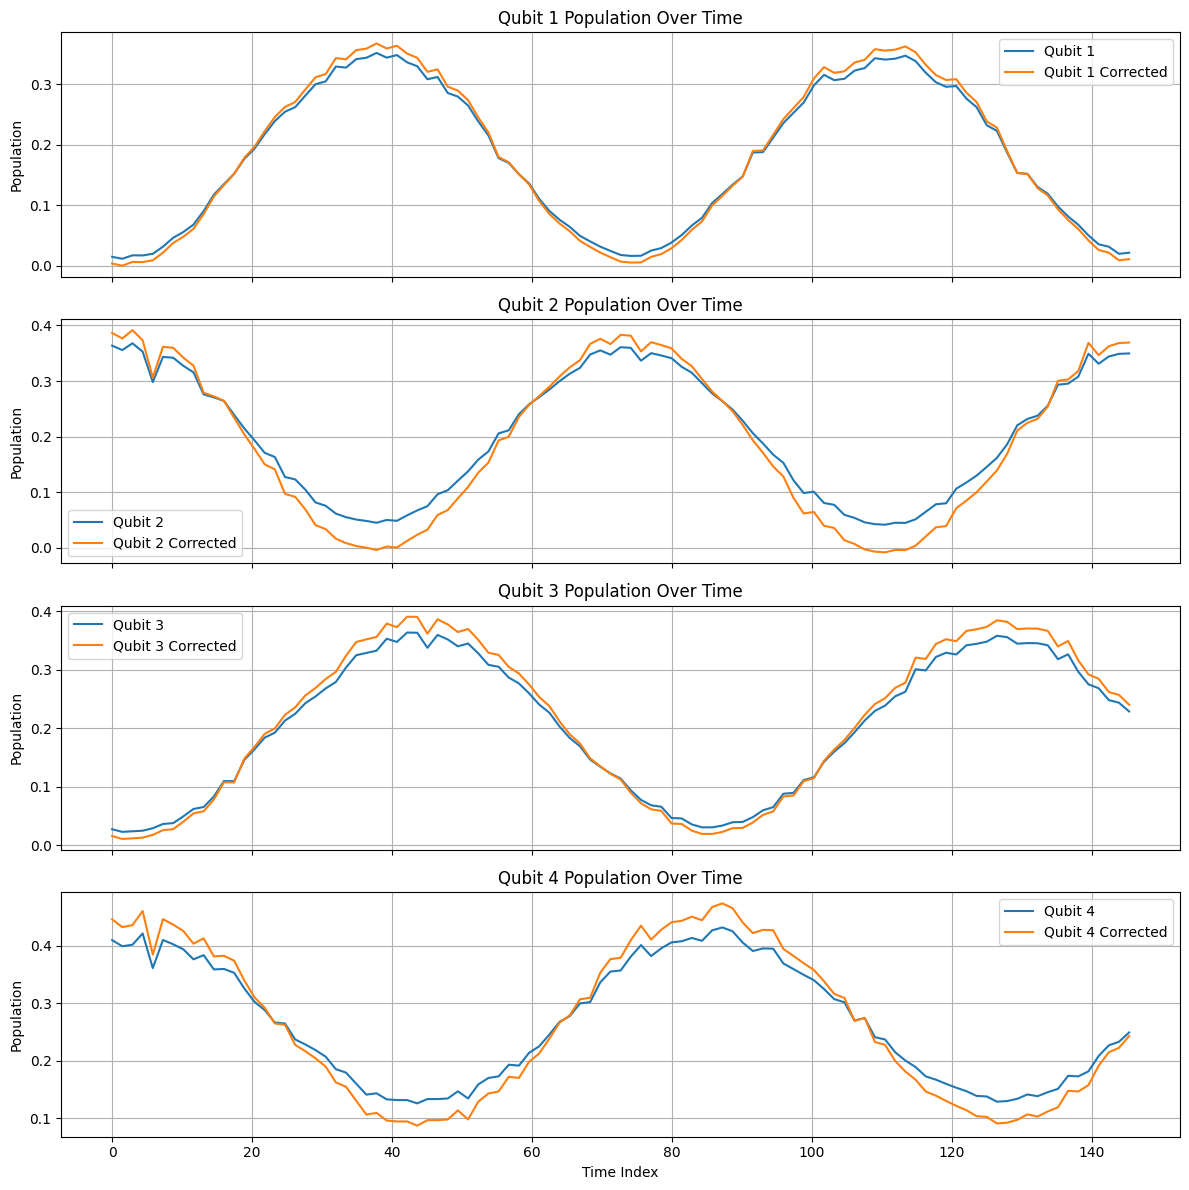

c:\Users\mattm\OneDrive\Desktop\Research\Projects\Triangle Lattice\Jupyter Notebooks\8Q_Triangle_Lattice_v1\correlation_measurements\src_correlation_measurement.py:115: RuntimeWarning: invalid value encountered in sqrt
  self.standard_deviation_corrected = np.sqrt(population_corrected * (1 - population_corrected))


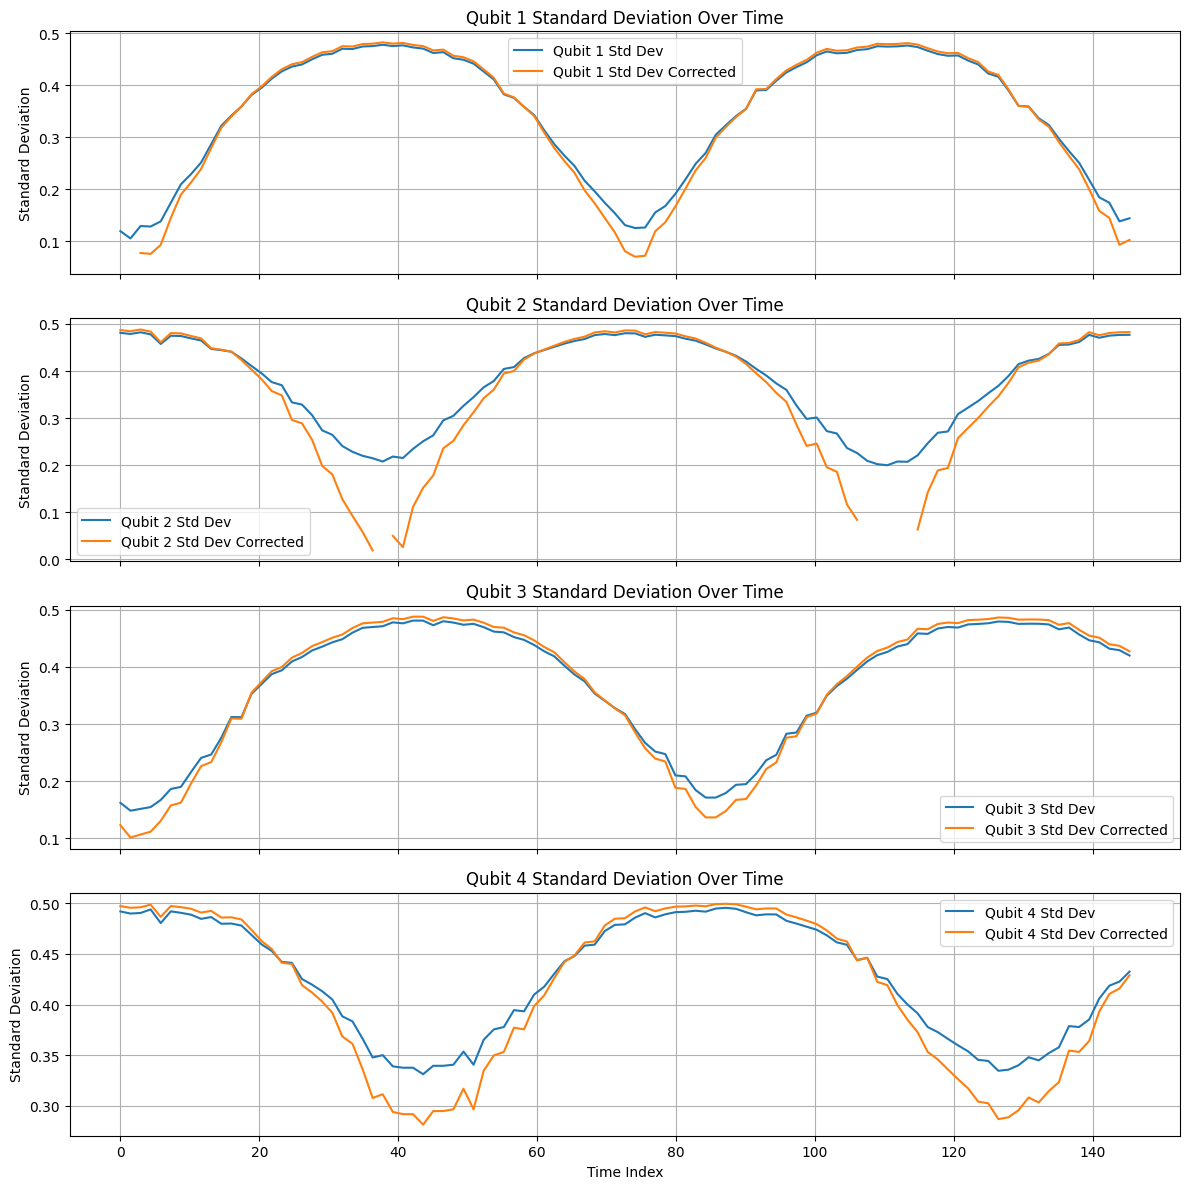

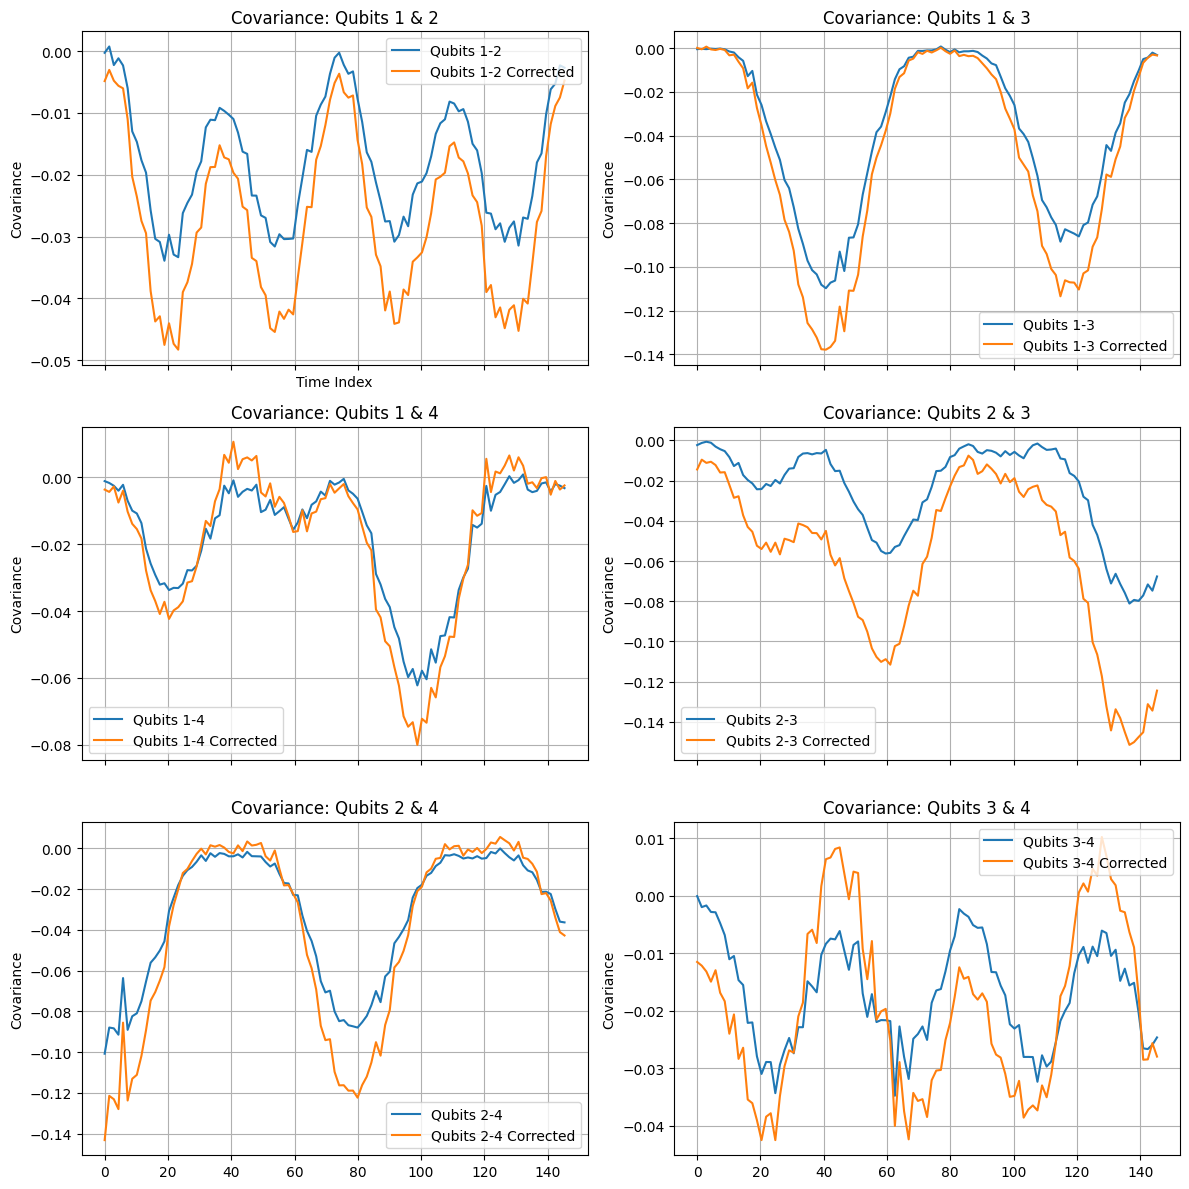

plotting state: Q1Q4


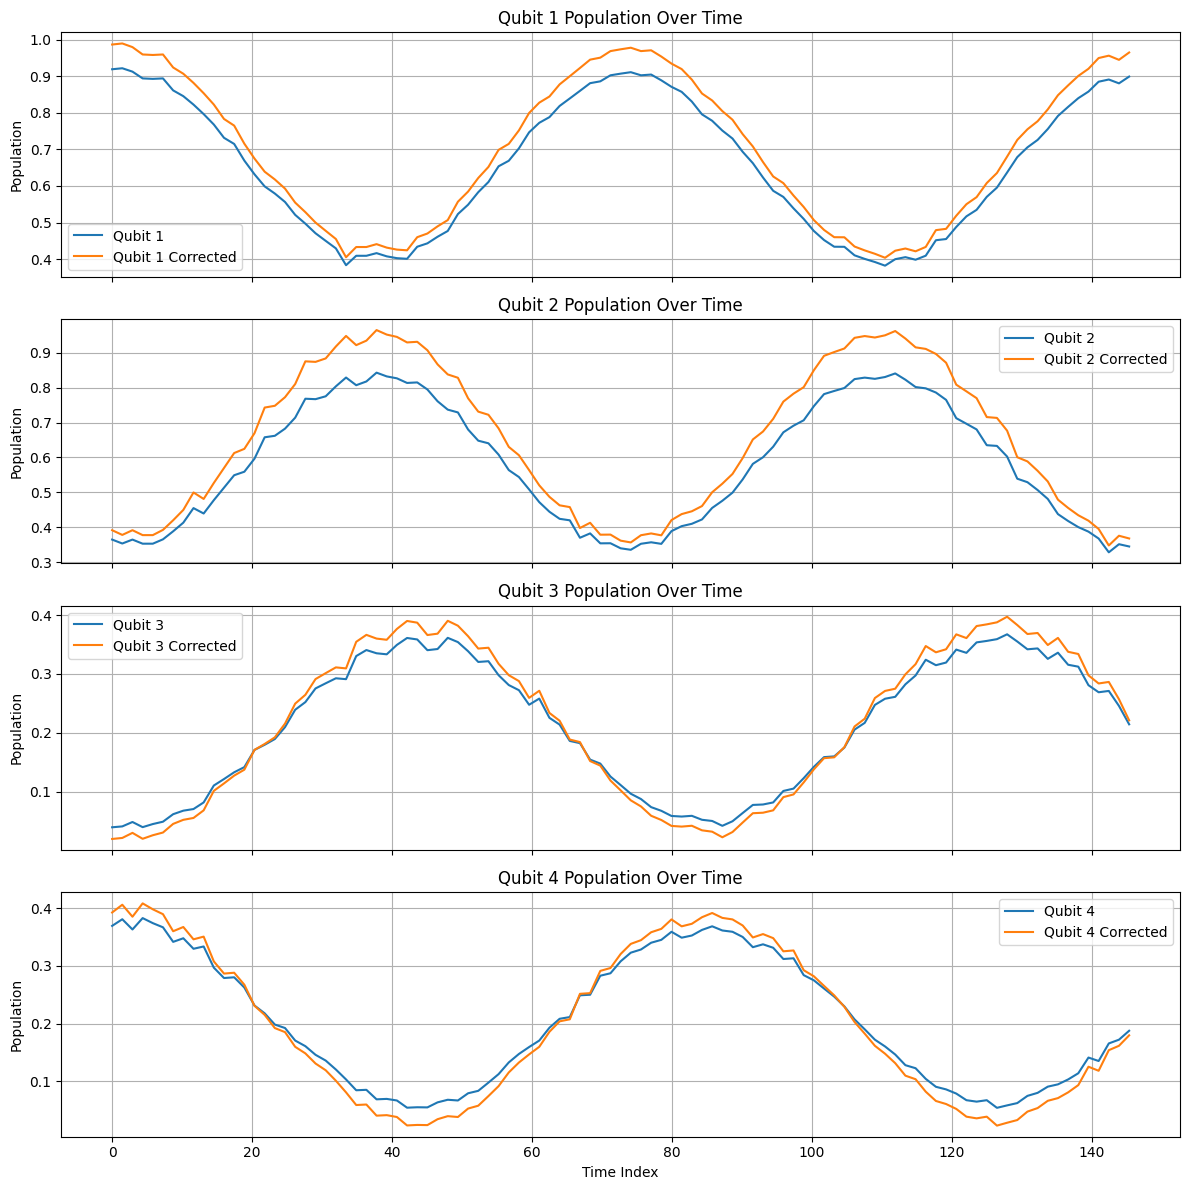

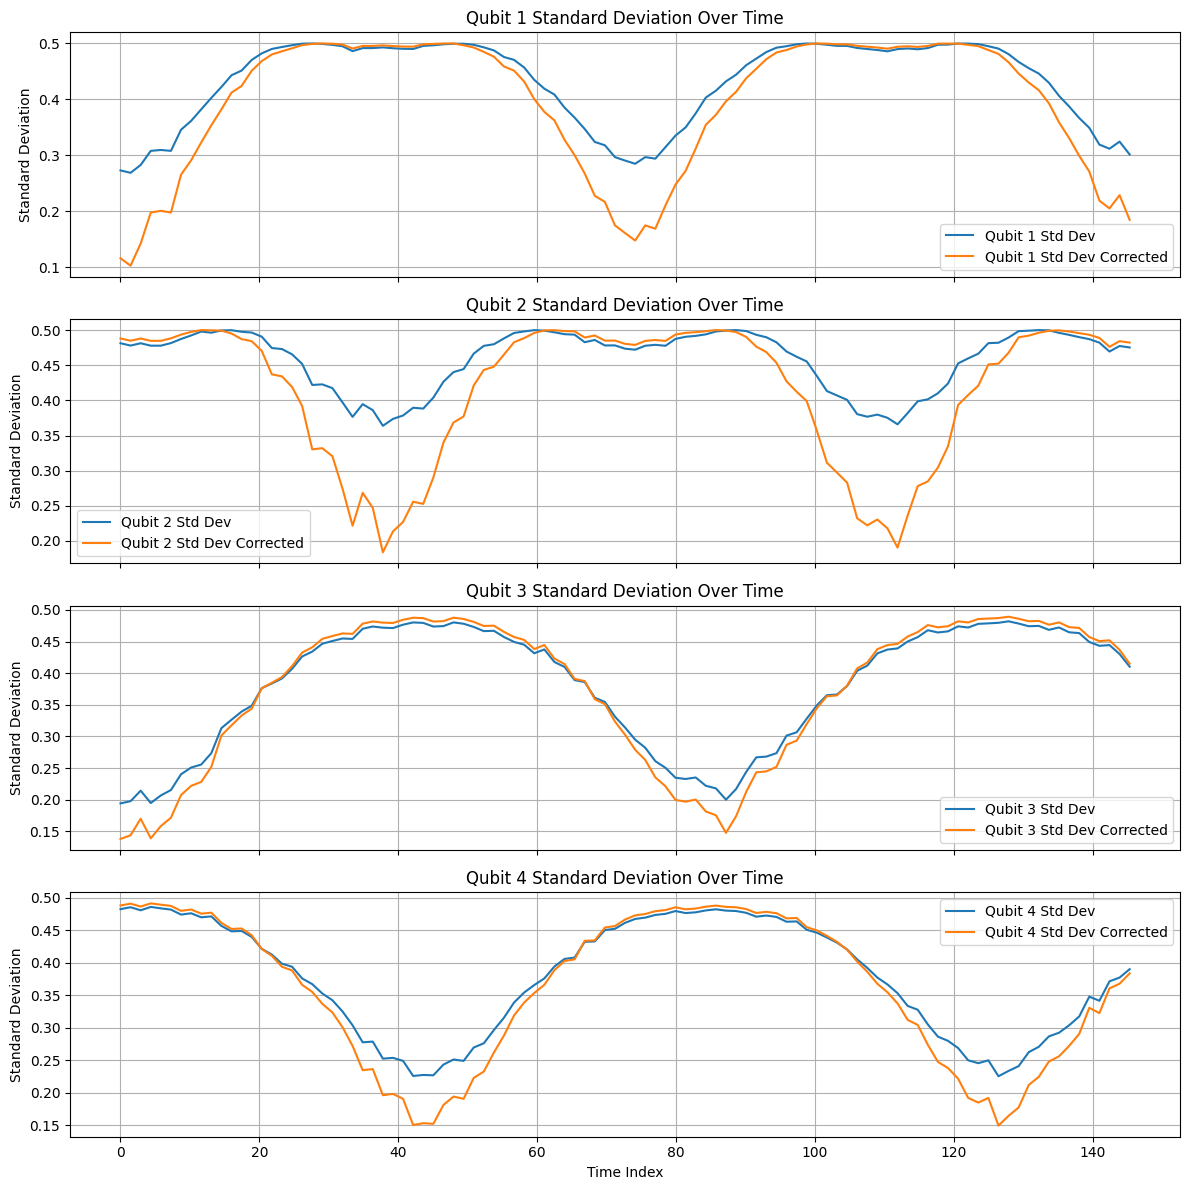

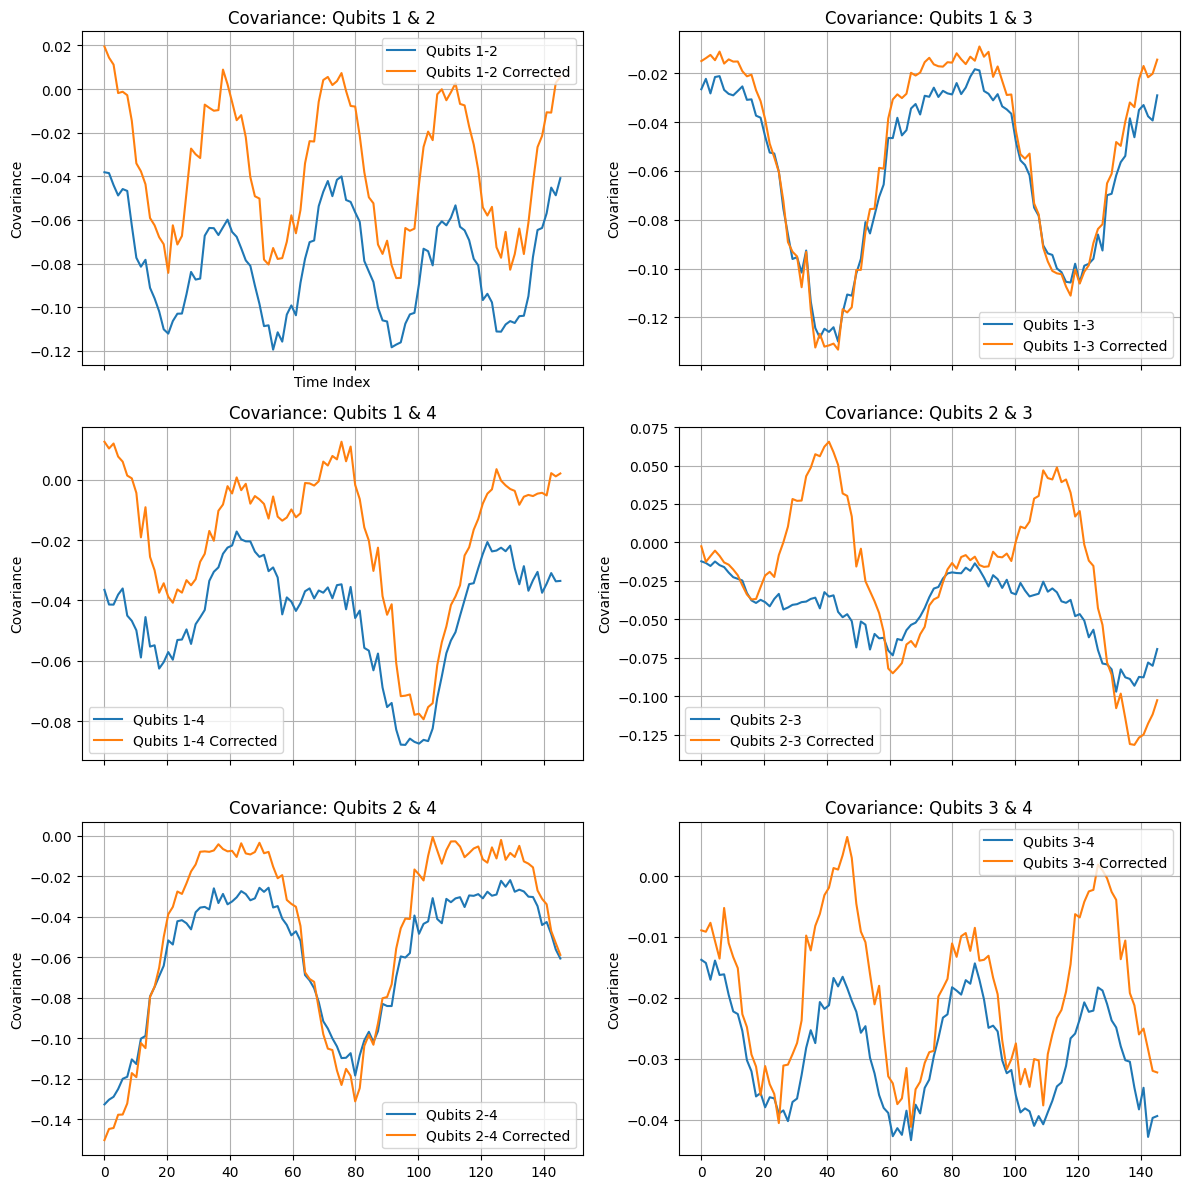

In [120]:
for state in state_to_measurement:
    print(f'plotting state: {state}')
    measurement = state_to_measurement[state]
    # measurement.plot_counts()

    measurement.plot_population_over_time(both=True)
    measurement.plot_standard_deviation(both=True)
    measurement.plot_covariance(both=True)

In [187]:
import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


# triangle lattice eigenstates

state = 'Q1'

num_levels = 3
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0

measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

T1 = 200  # 40 microseconds
T2 = 10  # 5 microseconds

# T1 = None
# T2 = None

# use the times from the measurement and convert to microseconds
times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'Q1Q2':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '1100'

elif state == 'Q1Q4':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '1001'

elif state == 'Q2':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '0100'

elif state == 'Q1':
    psi0 = -2
    num_particles = 1
    psi0_bitstring = '1000'

elif state == 'Q4':
    psi0 = -3
    num_particles = 1
    psi0_bitstring = '0001'


elif state == 'Q3':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '0010'


# Q1 and Q3 are isolated
initial_detunings[0] += 393 * 2 * np.pi
initial_detunings[2] -= 440 * 2 * np.pi

print(f'num_particles: {num_particles}')




current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)






####################################


### modify initial state
psi0 = current_correlation_simulation.psi0

x_state = False
if x_state:
    phase = 0
    psi0 = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])

    f_1 = 0.9
    f_2 = 1

    target_state = (qt.basis([num_levels]*4, [1,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [1,0,1,0])).unit()
    error_state_1 = (qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])).unit()
    error_state_2 = qt.basis([num_levels]*4, [1,0,0,0])
    error_state_3 = qt.basis([num_levels]*4, [0,0,0,0])

    target_state_rho = target_state*target_state.dag()
    error_state_rho_1 = error_state_1*error_state_1.dag()
    error_state_rho_2 = error_state_2*error_state_2.dag()
    error_state_rho_3 = error_state_3*error_state_3.dag()

    psi0 = f_1*f_2*target_state_rho + (1-f_1)*f_2*error_state_rho_1 + f_1*(1-f_2)*error_state_rho_2 + (1-f_1)*(1-f_2)*error_state_rho_3


add_phase = False
if add_phase:
    readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
    print(f'reaodut_indices: {readout_indices}')

    other_indices = [i for i in range(num_qubits) if i not in readout_indices]

    # psi0_reduced = qt.ptrace(psi0, other_indices)
    # psi0_reduced = qt.Qobj(psi0_reduced, dims=[[num_levels]*2]*2)

    # add a phase between the qubits

    phase = 0

    # two_qubit_annihilation_operators = []
    # two_qubit_annihilation_operators.append(qt.tensor(qt.destroy(num_levels), qt.qeye(num_levels)))
    # two_qubit_annihilation_operators.append(qt.tensor(qt.qeye(num_levels), qt.destroy(num_levels)))

    annihilation_operators = current_correlation_simulation.annihilation_operators
    a1 = annihilation_operators[readout_indices[0]]
    a2 = annihilation_operators[readout_indices[1]]

    # a1, a2 = two_qubit_annihilation_operators

    z1 = (2*a1.dag()*a1 - 1) / 2
    z2 = (2*a2.dag()*a2 - 1) / 2

    x1 = (a1 + a1.dag()) / 2
    x2 = (a2 + a2.dag()) / 2

    y1 = (a1 - a1.dag()) / (2j)
    y2 = (a2 - a2.dag()) / (2j)

    Z_2Q = z1 - z2
    X_2Q = x1*x2 + y1*y2
    y_2Q = x1*y2 - y1*x2

    phase = np.pi/4
    phase = 0
    U_phase = (1j*phase*(z1 - z2)).expm()


    psi0 = U_phase * psi0

    print(f'X: {qt.expect(X_2Q, psi0)}')
    print(f'Y: {qt.expect(y_2Q, psi0)}')
    print(f'Z: {qt.expect(Z_2Q, psi0)}')


imperfect_state = True
mixed = False
mixed_basis_states = True

if imperfect_state:
    if mixed:
        ### attempt to create a mixed state with the vacuum state/single particle states etc.
        target_state_rho = psi0*psi0.dag()
        f = 0.9
        
        # Count number of '1's in psi0_bitstring
        num_ones = psi0_bitstring.count('1')
        if num_ones == 2:

            eigenstate_particle_number_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()[num_particles]

            ones_indices = [i for i, bit in enumerate(psi0_bitstring) if bit == '1']
            print(f'Indices of 1s in psi0_bitstring: {ones_indices}')

            error_state_1 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_1 = error_state_1*error_state_1.dag()

            error_state_2 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_2 = error_state_2*error_state_2.dag()

            error_state_3 = qt.basis([num_levels]*num_qubits, [0]*num_qubits)
            error_state_rho_3 = error_state_3*error_state_3.dag()

            psi0 = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1

        else:
            print('only implemented for two particle states so far')
    elif mixed_basis_states:

        pre_ramp_detuning = np.array([393, 120, -440, -190]) * 2 * np.pi
        basis_state_to_index_dict = create_basis_state_to_index_mapping(pre_ramp_detuning, U)

        if state == 'Q2':


            basis_states = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
            probabilities = [0.183, 0.0206, 0.0072, 0.0002, 0.6684, 0.0656, 0.0268, 0.0022, 0.0042, 0.0002, 0.0002, 0.0, 0.0196, 0.0012, 0.0006, 0.0]

        elif state == 'Q1':

            basis_states = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
            probabilities = [0.0438, 0.0026, 0.003, 0.0004, 0.0024, 0.0, 0.0002, 0.0, 0.8202, 0.0244, 0.0454, 0.0016, 0.048, 0.004, 0.0038, 0.0002]
            
        initial_state = 0
        for i in range(len(basis_states)):
            probability = probabilities[i]
            basis_state = list(int(bit) for bit in basis_states[i])

            basis_state_psi = qt.basis([num_levels]*num_qubits, basis_state)

            eigenstate = convert_basis_state_to_eigenstate(sum(basis_state), basis_state_to_index_dict[tuple(basis_state)], current_correlation_simulation)

            eigenstate_rho = eigenstate*eigenstate.dag()

            initial_state += probability * eigenstate_rho
            psi0 = initial_state

    else:
        ### attempt to create a superposition state with the vacuum state/single particle states etc.
        current_correlation_simulation.psi0 = create_psi0_with_angles(psi0, current_correlation_simulation, num_levels, num_qubits, num_particles, psi0_angles, psi0_bitstring)

current_correlation_simulation.psi0 = psi0
# print(psi0.tr())
# print((psi0*psi0.dag()).tr())

for i in range(num_qubits):
    n_i = current_correlation_simulation.annihilation_operators[i].dag() * current_correlation_simulation.annihilation_operators[i]
    print(f'Q{i+1} population: {qt.expect(n_i, psi0)}')


psi0


num_particles: 1
Q1 population: 0.9512124895148953
Q2 population: 0.07390379971061102
Q3 population: 0.005132800764596227
Q4 population: 0.06375091000989759


Quantum object: dims=[[3, 3, 3, 3], [3, 3, 3, 3]], shape=(81, 81), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.38000000e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.49958566e-03  2.41726522e-20 ... -2.28323799e-50
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.41726522e-20  1.28054369e-04 ...  2.01232308e-33
   2.13418743e-44  0.00000000e+00]
 ...
 [ 0.00000000e+00 -2.28323799e-50  2.01232308e-33 ...  6.56797000e-44
   4.13574674e-44  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.13418743e-44 ...  4.13574674e-44
   3.53758027e-44  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

In [188]:
def convert_basis_state_to_eigenstate(num_particles, basis_state_index, current_correlation_simulation):
    '''
    convert a given pre-ramp basis state (str '0110' or list [0,1,1,0] e.g.) to the corresponding eigenstate of the 
    post-ramp Hamiltonian
    '''
    particle_number_to_eigenstate_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()

    eigenstate = particle_number_to_eigenstate_dict[num_particles][basis_state_index]
    return eigenstate

def create_basis_state_to_index_mapping(pre_ramp_detuning, U):

    all_basis_states = product(range(num_levels), repeat=num_qubits)

    particle_number_to_basis_states = {}
    particle_number_to_basis_state_energy = {}


    for basis_state in all_basis_states:
        energy = np.dot(basis_state, pre_ramp_detuning)

        for number in basis_state:
            energy += U*number*(number-1)

        particle_number = sum(basis_state)

        if not particle_number in particle_number_to_basis_states:
            particle_number_to_basis_states[particle_number] = []
            particle_number_to_basis_state_energy[particle_number] = []

        particle_number_to_basis_states[particle_number].append(basis_state)
        particle_number_to_basis_state_energy[particle_number].append(energy)

    basis_state_to_index = {}
    for particle_number in particle_number_to_basis_states:
        sorted_indices = np.argsort(particle_number_to_basis_state_energy[particle_number])
        particle_number_to_basis_state_energy[particle_number] = np.array(particle_number_to_basis_state_energy[particle_number])[sorted_indices]
        particle_number_to_basis_states[particle_number] = np.array(particle_number_to_basis_states[particle_number])[sorted_indices]

        for i in range(len(particle_number_to_basis_states[particle_number])):
            state = particle_number_to_basis_states[particle_number][i]
            basis_state_to_index[tuple(state)] = i

    return basis_state_to_index


In [189]:
# simulation
current_correlation_simulation.run_simulation()

population_simulation = current_correlation_simulation.get_population_average()
standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
covariance_simulation = current_correlation_simulation.get_covariance()
covariance_sum_simulation = current_correlation_simulation.get_covariance_sum()

# data
measurement = state_to_measurement[state]
corrected = True

if corrected:
    population_data = measurement.get_population_corrected()
    standard_deviation_data = measurement.get_standard_deviation_corrected()
    covariance_data = measurement.get_covariance_corrected()
else:
    population_data = measurement.get_population_average()
    standard_deviation_data = measurement.get_standard_deviation()
    covariance_data = measurement.get_covariance()

covariance_sum_data = covariance_data[0,2] - covariance_data[0,3] - covariance_data[1,2] + covariance_data[1,3]


running simulation
running mesolve


KeyError: 'Q1'

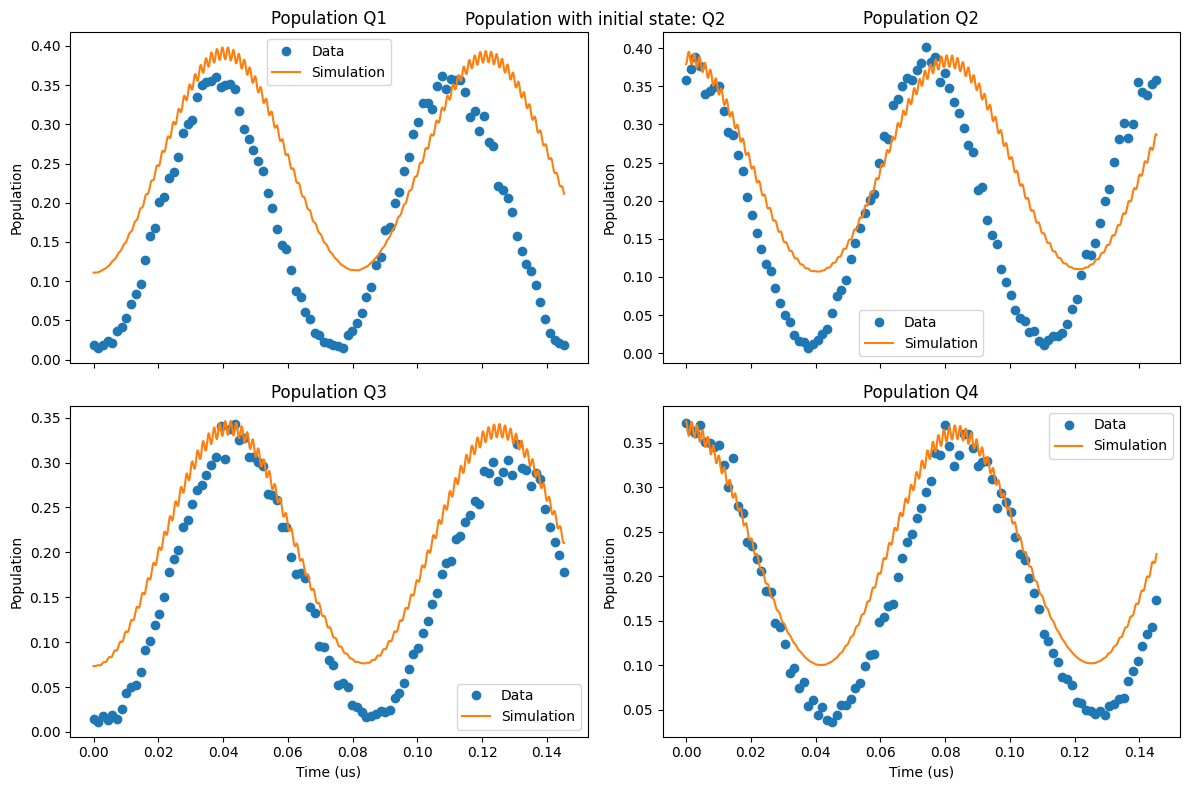

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, population_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, population_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Population {qubit_labels[idx]}')
    ax.set_ylabel('Population')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')
plt.tight_layout()
plt.suptitle(f'Population with initial state: {state}')
plt.show()



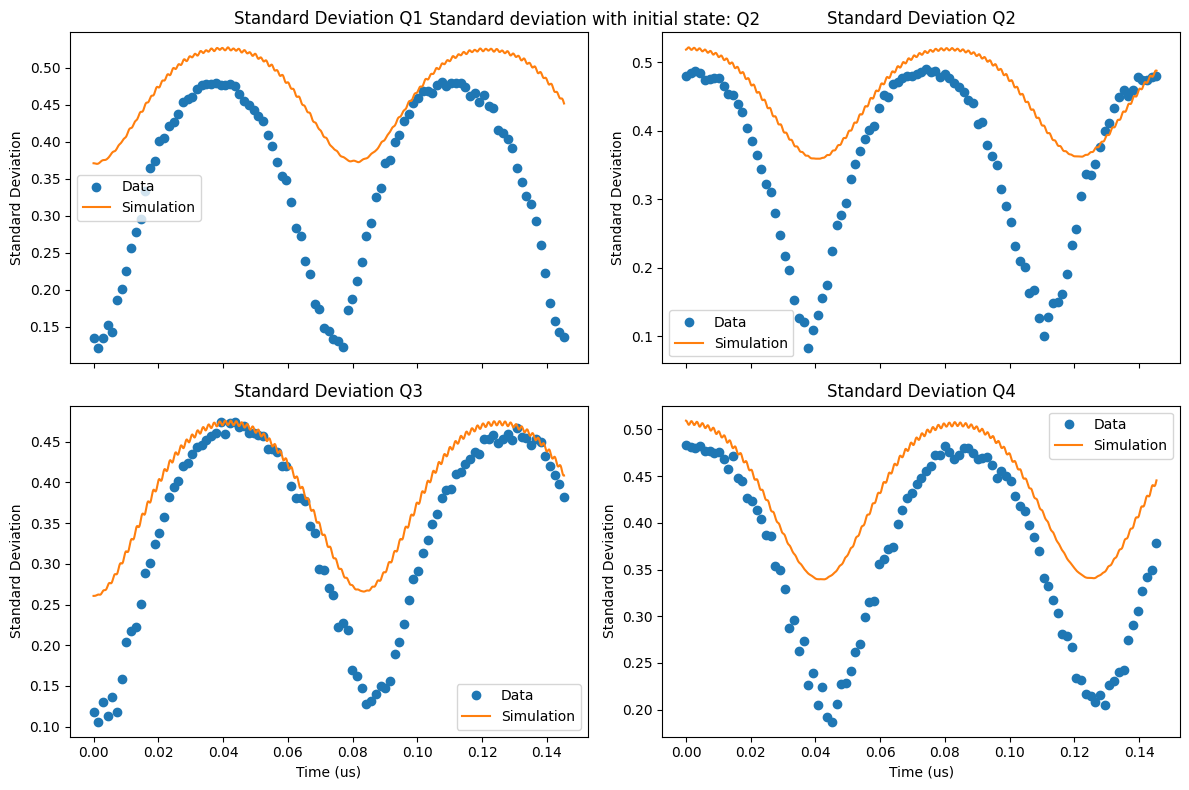

In [184]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, standard_deviation_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, standard_deviation_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Standard Deviation {qubit_labels[idx]}')
    ax.set_ylabel('Standard Deviation')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')

plt.tight_layout()

plt.suptitle(f'Standard deviation with initial state: {state}')
plt.show()



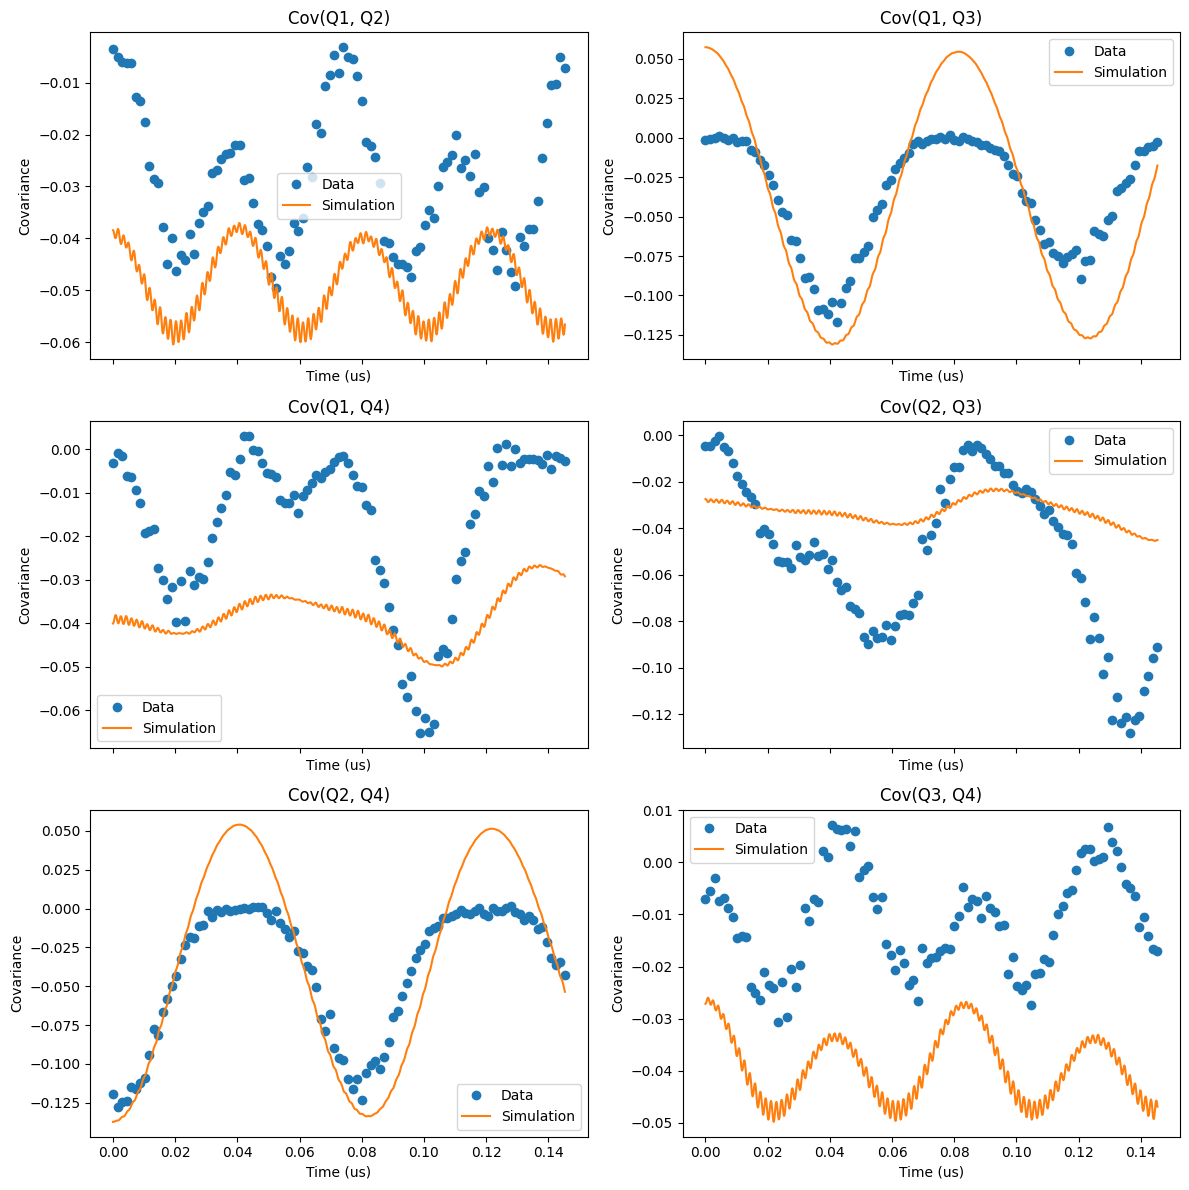

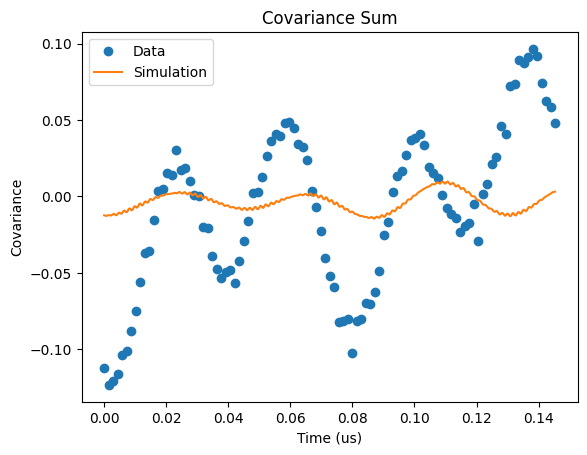

In [185]:
qubit_pairs = [(i, j) for i in range(num_qubits) for j in range(num_qubits) if i < j]

num_plots = len(qubit_pairs)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)
if num_rows == 1:
    axs = axs.reshape(1, -1)  # Ensure axs is 2D even for single row
axs = axs.flatten()

for idx, (i, j) in enumerate(qubit_pairs):
    ax = axs[idx]
    # Plot data
    ax.plot(times, covariance_data[i, j], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, covariance_simulation[i, j], '-', label='Simulation')
    ax.set_title(f'Cov(Q{i+1}, Q{j+1})')
    ax.set_xlabel('Time (us)')
    ax.set_ylabel('Covariance')
    ax.legend()

# Hide unused axes
for k in range(num_plots, len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()



plt.plot(times, covariance_sum_data, 'o', label='Data')
plt.plot(simulation_times, covariance_sum_simulation, '-', label='Simulation')
plt.title('Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel('Covariance')
plt.legend()


# 2.2.2
Simulations for Q1, Q2, Q4 resonance


In [115]:
# look at ramp then swaps

importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

state_to_filename = {}

# ramp Q1, Q2, Q4 onto resonance, then jump Q1 onto Q2 and Q3 onto Q4
state_to_filename['Q2'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '16', '14', '16') # Q2
# state_to_filename['Q1'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '15', '17', '15') # Q1
# state_to_filename['Q4'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '15', '20', '31') # Q4
# state_to_filename['Q3'] = generate_ramp_oscillation_population_shots_filename('2025', '08', '12', '15', '28', '33') # Q3


state_to_measurement = {}
state_to_population = {}
state_to_standard_deviation = {}
state_to_covariance = {}

for state in state_to_filename:
    filename = state_to_filename[state]
    measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)
    state_to_measurement[state] = measurement


    # measurement.plot_counts(corrected=True)
    # measurement.plot_population_over_time(both=True)


    population_data = measurement.get_population_average()
    # population_data = measurement.get_population_corrected()

    standard_deviation_data = measurement.get_standard_deviation()
    # standard_deviation_data = measurement.get_standard_deviation_corrected()

    covariance_data = measurement.get_covariance()
    # covariance_data = measurement.get_covariance_corrected()

    # readout_qubits = measurement.get_readout_qubits()

    state_to_population[state] = population_data
    state_to_standard_deviation[state] = standard_deviation_data
    state_to_covariance[state] = covariance_data



plotting state: Q2


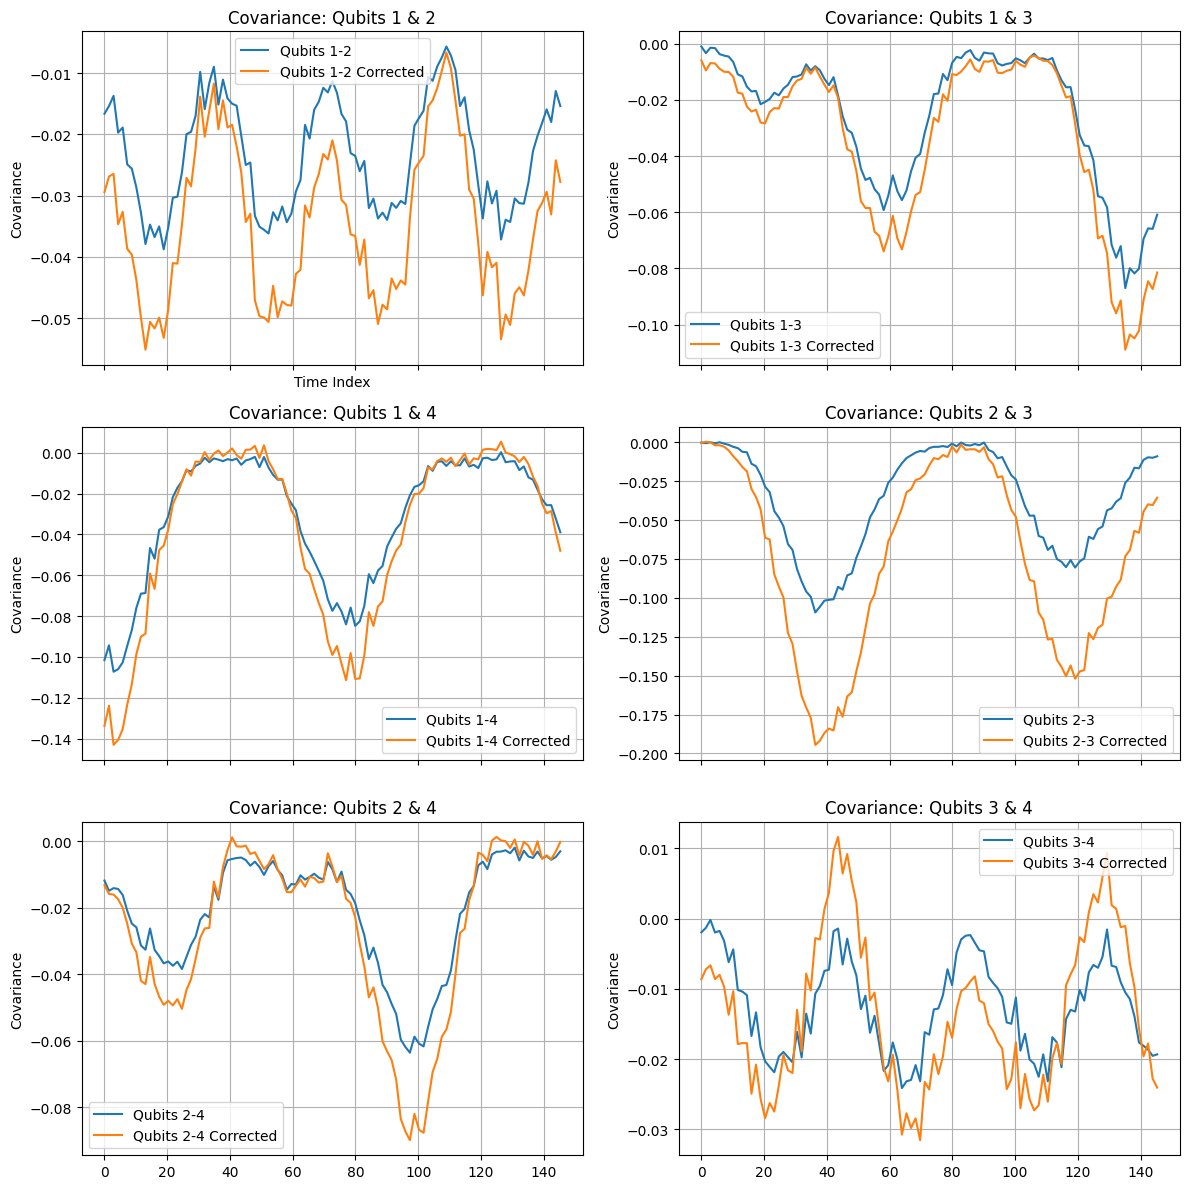

In [116]:
for state in state_to_measurement:
    print(f'plotting state: {state}')
    measurement = state_to_measurement[state]
    # measurement.plot_counts()

    # measurement.plot_population_over_time(both=True)
    # measurement.plot_standard_deviation(both=True)
    measurement.plot_covariance(both=True)

In [73]:
import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


# triangle lattice eigenstates

state = 'Q3'

num_levels = 3
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0

measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

# T1 = 200  # 40 microseconds
# T2 = 10  # 5 microseconds

T1 = None
T2 = None

# use the times from the measurement and convert to microseconds
times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'Q1Q2':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '1100'

elif state == 'Q1Q4':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '1001'

elif state == 'Q2':
    psi0 = -2
    num_particles = 1
    psi0_bitstring = '0100'

elif state == 'Q1':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '1000'

    measurement_J = 2 * 2 * np.pi
    measurement_J = measurement_J

    
elif state == 'Q4':
    psi0 = -3
    num_particles = 1
    psi0_bitstring = '0001'


elif state == 'Q3':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '0010'


# Q3 is isolated
initial_detunings[2] -= 440 * 2 * np.pi

print(f'num_particles: {num_particles}')




current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)






####################################


### modify initial state
psi0 = current_correlation_simulation.psi0

x_state = False
if x_state:
    phase = 0
    psi0 = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])

    f_1 = 0.9
    f_2 = 1

    target_state = (qt.basis([num_levels]*4, [1,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [1,0,1,0])).unit()
    error_state_1 = (qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])).unit()
    error_state_2 = qt.basis([num_levels]*4, [1,0,0,0])
    error_state_3 = qt.basis([num_levels]*4, [0,0,0,0])

    target_state_rho = target_state*target_state.dag()
    error_state_rho_1 = error_state_1*error_state_1.dag()
    error_state_rho_2 = error_state_2*error_state_2.dag()
    error_state_rho_3 = error_state_3*error_state_3.dag()

    psi0 = f_1*f_2*target_state_rho + (1-f_1)*f_2*error_state_rho_1 + f_1*(1-f_2)*error_state_rho_2 + (1-f_1)*(1-f_2)*error_state_rho_3


add_phase = False
if add_phase:
    readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
    print(f'reaodut_indices: {readout_indices}')

    other_indices = [i for i in range(num_qubits) if i not in readout_indices]

    # psi0_reduced = qt.ptrace(psi0, other_indices)
    # psi0_reduced = qt.Qobj(psi0_reduced, dims=[[num_levels]*2]*2)

    # add a phase between the qubits

    phase = 0

    # two_qubit_annihilation_operators = []
    # two_qubit_annihilation_operators.append(qt.tensor(qt.destroy(num_levels), qt.qeye(num_levels)))
    # two_qubit_annihilation_operators.append(qt.tensor(qt.qeye(num_levels), qt.destroy(num_levels)))

    annihilation_operators = current_correlation_simulation.annihilation_operators
    a1 = annihilation_operators[readout_indices[0]]
    a2 = annihilation_operators[readout_indices[1]]

    # a1, a2 = two_qubit_annihilation_operators

    z1 = (2*a1.dag()*a1 - 1) / 2
    z2 = (2*a2.dag()*a2 - 1) / 2

    x1 = (a1 + a1.dag()) / 2
    x2 = (a2 + a2.dag()) / 2

    y1 = (a1 - a1.dag()) / (2j)
    y2 = (a2 - a2.dag()) / (2j)

    Z_2Q = z1 - z2
    X_2Q = x1*x2 + y1*y2
    y_2Q = x1*y2 - y1*x2

    phase = np.pi/4
    phase = 0
    U_phase = (1j*phase*(z1 - z2)).expm()


    psi0 = U_phase * psi0

    print(f'X: {qt.expect(X_2Q, psi0)}')
    print(f'Y: {qt.expect(y_2Q, psi0)}')
    print(f'Z: {qt.expect(Z_2Q, psi0)}')


imperfect_state = False
mixed = False

if imperfect_state:
    if mixed:
        ### attempt to create a mixed state with the vacuum state/single particle states etc.
        target_state_rho = psi0*psi0.dag()
        f = 0.9
        
        # Count number of '1's in psi0_bitstring
        num_ones = psi0_bitstring.count('1')
        if num_ones == 2:

            eigenstate_particle_number_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()[num_particles]

            ones_indices = [i for i, bit in enumerate(psi0_bitstring) if bit == '1']
            print(f'Indices of 1s in psi0_bitstring: {ones_indices}')

            error_state_1 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_1 = error_state_1*error_state_1.dag()

            error_state_2 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_2 = error_state_2*error_state_2.dag()

            error_state_3 = qt.basis([num_levels]*num_qubits, [0]*num_qubits)
            error_state_rho_3 = error_state_3*error_state_3.dag()

            psi0 = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1

        else:
            print('only implemented for two particle states so far')
    else:
        ### attempt to create a superposition state with the vacuum state/single particle states etc.

        current_correlation_simulation.psi0 = create_psi0_with_angles(psi0, current_correlation_simulation, num_levels, num_qubits, num_particles, psi0_angles, psi0_bitstring)
        

current_correlation_simulation.psi0 = psi0
# print(psi0.tr())
# print((psi0*psi0.dag()).tr())

for i in range(num_qubits):
    n_i = current_correlation_simulation.annihilation_operators[i].dag() * current_correlation_simulation.annihilation_operators[i]
    print(f'Q{i+1} population: {qt.expect(n_i, psi0)}')




num_particles: 1
Q1 population: 0.00027750321940706556
Q2 population: 0.00019242622044990886
Q3 population: 0.9993409926954704
Q4 population: 0.00018907786467276682


In [74]:
# simulation
current_correlation_simulation.run_simulation()

population_simulation = current_correlation_simulation.get_population_average()
standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
covariance_simulation = current_correlation_simulation.get_covariance()
covariance_sum_simulation = current_correlation_simulation.get_covariance_sum()

# data
measurement = state_to_measurement[state]
corrected = True

if corrected:
    population_data = measurement.get_population_corrected()
    standard_deviation_data = measurement.get_standard_deviation_corrected()
    covariance_data = measurement.get_covariance_corrected()
else:
    population_data = measurement.get_population_average()
    standard_deviation_data = measurement.get_standard_deviation()
    covariance_data = measurement.get_covariance()

covariance_sum_data = covariance_data[0,2] - covariance_data[0,3] - covariance_data[1,2] + covariance_data[1,3]


running simulation
running sesolve


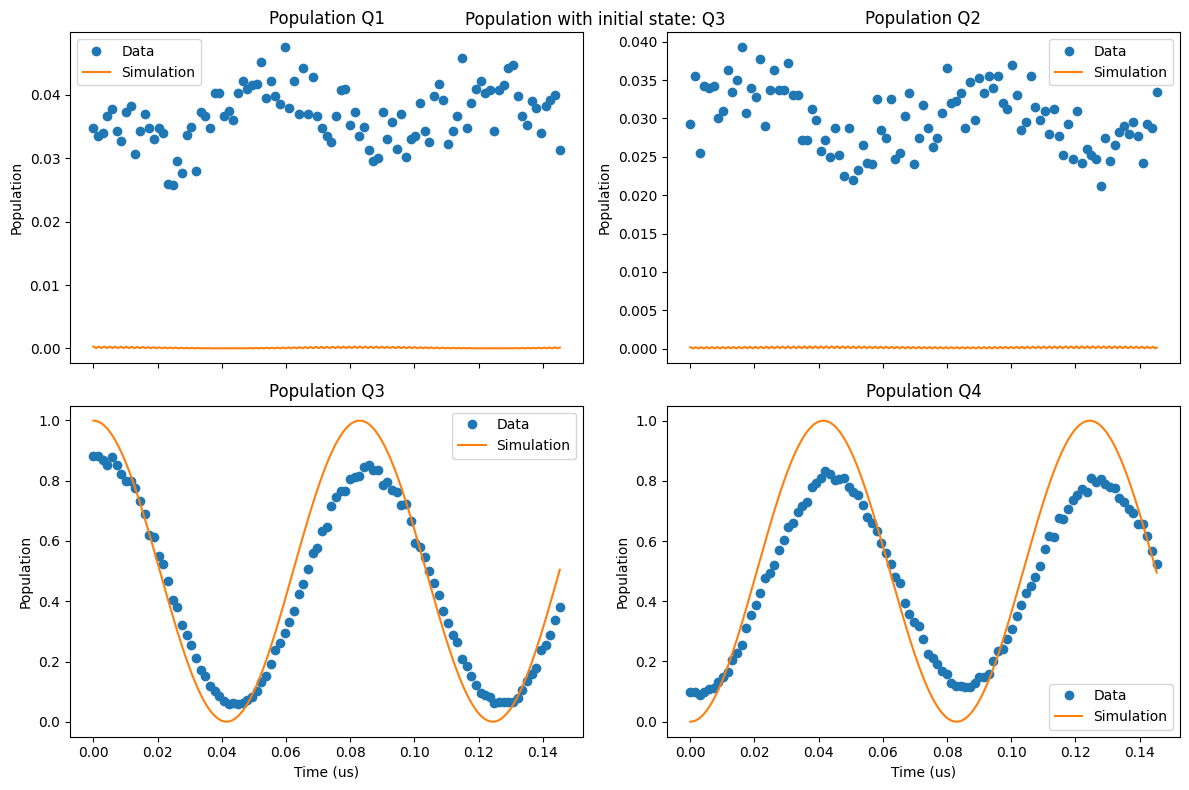

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, population_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, population_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Population {qubit_labels[idx]}')
    ax.set_ylabel('Population')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')
plt.tight_layout()
plt.suptitle(f'Population with initial state: {state}')
plt.show()



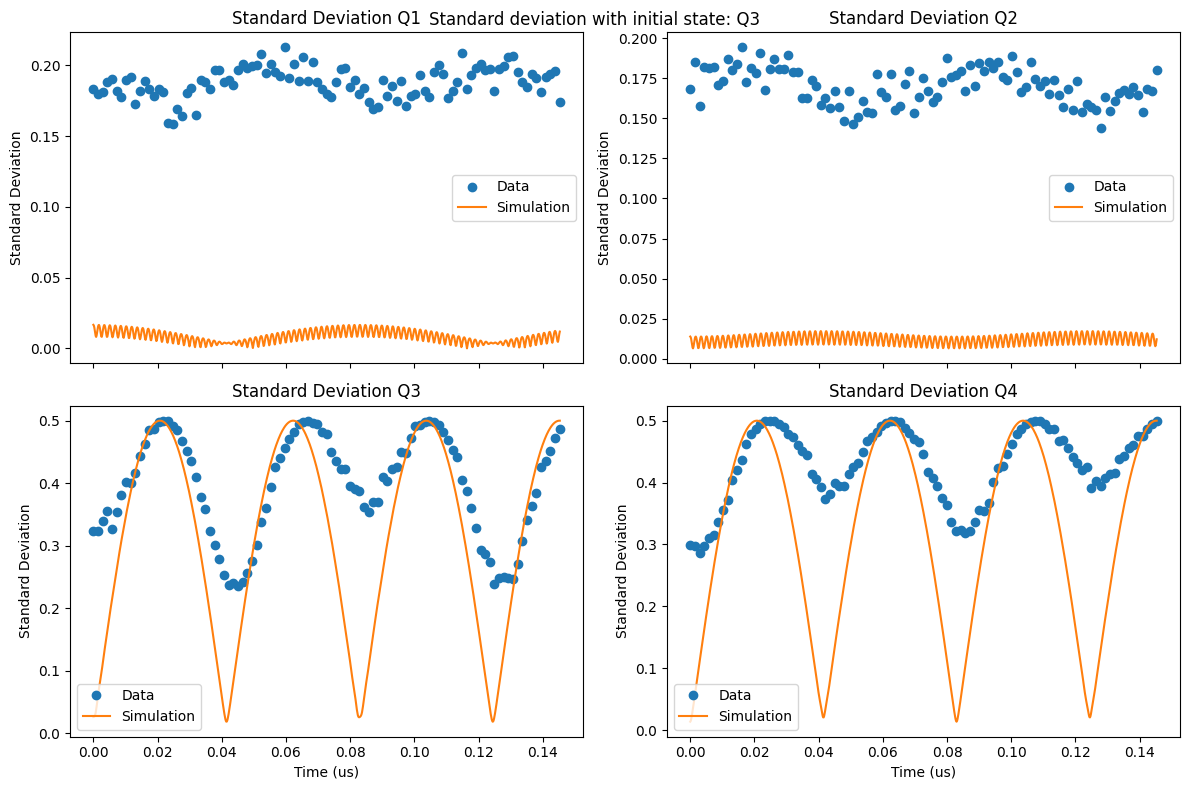

In [76]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, standard_deviation_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, standard_deviation_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Standard Deviation {qubit_labels[idx]}')
    ax.set_ylabel('Standard Deviation')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')

plt.tight_layout()

plt.suptitle(f'Standard deviation with initial state: {state}')
plt.show()



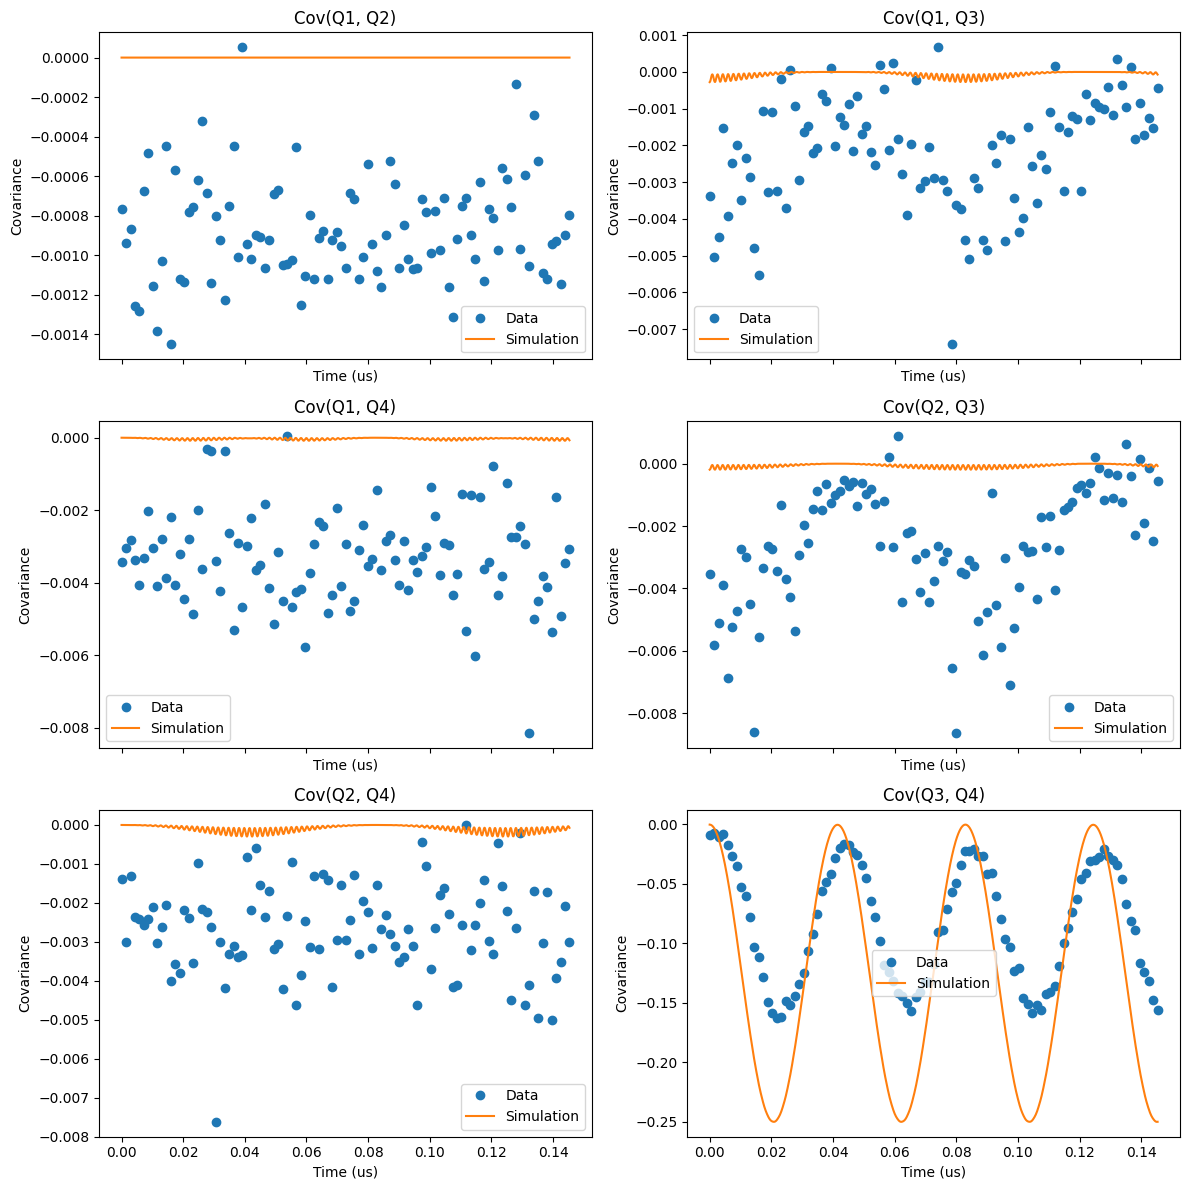

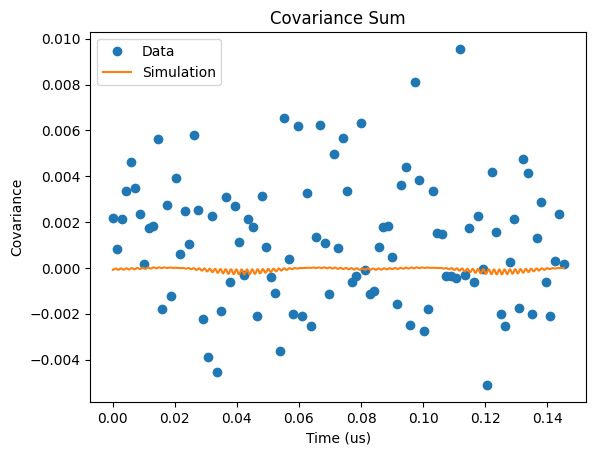

In [77]:
qubit_pairs = [(i, j) for i in range(num_qubits) for j in range(num_qubits) if i < j]

num_plots = len(qubit_pairs)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)
if num_rows == 1:
    axs = axs.reshape(1, -1)  # Ensure axs is 2D even for single row
axs = axs.flatten()

for idx, (i, j) in enumerate(qubit_pairs):
    ax = axs[idx]
    # Plot data
    ax.plot(times, covariance_data[i, j], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, covariance_simulation[i, j], '-', label='Simulation')
    ax.set_title(f'Cov(Q{i+1}, Q{j+1})')
    ax.set_xlabel('Time (us)')
    ax.set_ylabel('Covariance')
    ax.legend()

# Hide unused axes
for k in range(num_plots, len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()



plt.plot(times, covariance_sum_data, 'o', label='Data')
plt.plot(simulation_times, covariance_sum_simulation, '-', label='Simulation')
plt.title('Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel('Covariance')
plt.legend()


### 2.2.3 4 Qubit Resonance

In [7]:
# look at ramp then swaps

importlib.reload(src_correlation_measurement)
from src_correlation_measurement import RampOscillationShotsMeasurement

state_to_filename = {}

# ramp Q1, Q2, Q3, Q4 onto resonance, then jump Q1 onto Q2 and Q3 onto Q4


state_to_filename['Q1Q4'] = generate_ramp_beamsplitter_correlations_filename('2025', '08', '17', '11', '14', '25')


state_to_measurement = {}
state_to_population = {}
state_to_standard_deviation = {}
state_to_covariance = {}

for state in state_to_filename:
    filename = state_to_filename[state]
    measurement = RampOscillationShotsMeasurement(filename, singleshot_measurement_dict)
    state_to_measurement[state] = measurement


    # measurement.plot_counts(corrected=True)
    # measurement.plot_population_over_time(both=True)


    population_data = measurement.get_population_average()
    # population_data = measurement.get_population_corrected()

    standard_deviation_data = measurement.get_standard_deviation()
    # standard_deviation_data = measurement.get_standard_deviation_corrected()

    covariance_data = measurement.get_covariance()
    # covariance_data = measurement.get_covariance_corrected()

    # readout_qubits = measurement.get_readout_qubits()

    state_to_population[state] = population_data
    state_to_standard_deviation[state] = standard_deviation_data
    state_to_covariance[state] = covariance_data



I
Q
Qubit_Readout_List
angle
confusion_matrix
expt_samples
nn_correlations
population_shots
readout_list
threshold


KeyError: "Unable to open object (object 'counts' doesn't exist)"

In [ ]:
import src.src_current_measurement_simulations
importlib.reload(src.src_current_measurement_simulations)
from src.src_current_measurement_simulations import CurrentMeasurementSimulation


# triangle lattice eigenstates

state = 'Q3'

num_levels = 3
num_qubits = 4

# pi flux
J = -np.array([6.26, 5.9, 5.95]) * 2 * np.pi # MHz
J_parallel = -np.array([7.25, 7.65]) * 2 * np.pi # MHz


initial_detunings = np.array([0, 0, 0, 0]) * 2 * np.pi # MHz
psi0_angles = [np.pi, 0, np.pi, 0]  # theta_1, phi_1, theta_2, phi_2
scale_factor = 1.0

measurement_J = J.copy()
measurement_J_parallel = J_parallel.copy()
measurement_detuning = 450 * 2 * np.pi  # MHz

measurement_detuning = np.array([310, 310, -280, -280]) * 2 * np.pi  # MHz



U = -180 * 2 * np.pi

# T1 = 200  # 40 microseconds
# T2 = 10  # 5 microseconds

T1 = None
T2 = None

# use the times from the measurement and convert to microseconds
times = measurement.get_times()/1e3
simulation_times = np.linspace(times[0], times[-1], 1001)  # Interpolating to 1001 points

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

# psi0 = 'highest_single_particle'


if state == 'Q1Q2':
    psi0 = -1
    num_particles = 2
    psi0_bitstring = '1100'

elif state == 'Q1Q4':
    psi0 = -2
    num_particles = 2
    psi0_bitstring = '1001'

elif state == 'Q2':
    psi0 = -2
    num_particles = 1
    psi0_bitstring = '0100'

elif state == 'Q1':
    psi0 = -1
    num_particles = 1
    psi0_bitstring = '1000'

    measurement_J = 2 * 2 * np.pi
    measurement_J = measurement_J

    
elif state == 'Q4':
    psi0 = -3
    num_particles = 1
    psi0_bitstring = '0001'


elif state == 'Q3':
    psi0 = 0
    num_particles = 1
    psi0_bitstring = '0010'


# Q3 is isolated
initial_detunings[2] -= 440 * 2 * np.pi

print(f'num_particles: {num_particles}')




current_correlation_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, simulation_times,
                                                              [0,1], [2,3], initial_detunings, measurement_detuning, measurement_J, measurement_J_parallel,
                                                              psi0=psi0, time_offset=0, T1=T1, T2=T2)






####################################


### modify initial state
psi0 = current_correlation_simulation.psi0

x_state = False
if x_state:
    phase = 0
    psi0 = qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])

    f_1 = 0.9
    f_2 = 1

    target_state = (qt.basis([num_levels]*4, [1,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [1,0,1,0])).unit()
    error_state_1 = (qt.basis([num_levels]*4, [0,1,0,0]) + np.exp(1j*phase)*qt.basis([num_levels]*4, [0,0,1,0])).unit()
    error_state_2 = qt.basis([num_levels]*4, [1,0,0,0])
    error_state_3 = qt.basis([num_levels]*4, [0,0,0,0])

    target_state_rho = target_state*target_state.dag()
    error_state_rho_1 = error_state_1*error_state_1.dag()
    error_state_rho_2 = error_state_2*error_state_2.dag()
    error_state_rho_3 = error_state_3*error_state_3.dag()

    psi0 = f_1*f_2*target_state_rho + (1-f_1)*f_2*error_state_rho_1 + f_1*(1-f_2)*error_state_rho_2 + (1-f_1)*(1-f_2)*error_state_rho_3


add_phase = False
if add_phase:
    readout_indices = [i-1 for i in readout_qubits]  # Adjust for 0-based indexing
    print(f'reaodut_indices: {readout_indices}')

    other_indices = [i for i in range(num_qubits) if i not in readout_indices]

    # psi0_reduced = qt.ptrace(psi0, other_indices)
    # psi0_reduced = qt.Qobj(psi0_reduced, dims=[[num_levels]*2]*2)

    # add a phase between the qubits

    phase = 0

    # two_qubit_annihilation_operators = []
    # two_qubit_annihilation_operators.append(qt.tensor(qt.destroy(num_levels), qt.qeye(num_levels)))
    # two_qubit_annihilation_operators.append(qt.tensor(qt.qeye(num_levels), qt.destroy(num_levels)))

    annihilation_operators = current_correlation_simulation.annihilation_operators
    a1 = annihilation_operators[readout_indices[0]]
    a2 = annihilation_operators[readout_indices[1]]

    # a1, a2 = two_qubit_annihilation_operators

    z1 = (2*a1.dag()*a1 - 1) / 2
    z2 = (2*a2.dag()*a2 - 1) / 2

    x1 = (a1 + a1.dag()) / 2
    x2 = (a2 + a2.dag()) / 2

    y1 = (a1 - a1.dag()) / (2j)
    y2 = (a2 - a2.dag()) / (2j)

    Z_2Q = z1 - z2
    X_2Q = x1*x2 + y1*y2
    y_2Q = x1*y2 - y1*x2

    phase = np.pi/4
    phase = 0
    U_phase = (1j*phase*(z1 - z2)).expm()


    psi0 = U_phase * psi0

    print(f'X: {qt.expect(X_2Q, psi0)}')
    print(f'Y: {qt.expect(y_2Q, psi0)}')
    print(f'Z: {qt.expect(Z_2Q, psi0)}')


imperfect_state = False
mixed = False

if imperfect_state:
    if mixed:
        ### attempt to create a mixed state with the vacuum state/single particle states etc.
        target_state_rho = psi0*psi0.dag()
        f = 0.9
        
        # Count number of '1's in psi0_bitstring
        num_ones = psi0_bitstring.count('1')
        if num_ones == 2:

            eigenstate_particle_number_dict = current_correlation_simulation.get_particle_number_to_eigenstate_dict()[num_particles]

            ones_indices = [i for i, bit in enumerate(psi0_bitstring) if bit == '1']
            print(f'Indices of 1s in psi0_bitstring: {ones_indices}')

            error_state_1 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_1 = error_state_1*error_state_1.dag()

            error_state_2 = eigenstate_particle_number_dict[ones_indices[0]]
            error_state_rho_2 = error_state_2*error_state_2.dag()

            error_state_3 = qt.basis([num_levels]*num_qubits, [0]*num_qubits)
            error_state_rho_3 = error_state_3*error_state_3.dag()

            psi0 = f**2*target_state_rho + (1-f)*f*error_state_rho_2 + (1-f)*f*error_state_rho_3 + (1-f)*(1-f)*error_state_rho_1

        else:
            print('only implemented for two particle states so far')
    else:
        ### attempt to create a superposition state with the vacuum state/single particle states etc.

        current_correlation_simulation.psi0 = create_psi0_with_angles(psi0, current_correlation_simulation, num_levels, num_qubits, num_particles, psi0_angles, psi0_bitstring)
        

current_correlation_simulation.psi0 = psi0
# print(psi0.tr())
# print((psi0*psi0.dag()).tr())

for i in range(num_qubits):
    n_i = current_correlation_simulation.annihilation_operators[i].dag() * current_correlation_simulation.annihilation_operators[i]
    print(f'Q{i+1} population: {qt.expect(n_i, psi0)}')




In [ ]:
# simulation
current_correlation_simulation.run_simulation()

population_simulation = current_correlation_simulation.get_population_average()
standard_deviation_simulation = current_correlation_simulation.get_standard_deviation()
covariance_simulation = current_correlation_simulation.get_covariance()
covariance_sum_simulation = current_correlation_simulation.get_covariance_sum()

# data
measurement = state_to_measurement[state]
corrected = True

if corrected:
    population_data = measurement.get_population_corrected()
    standard_deviation_data = measurement.get_standard_deviation_corrected()
    covariance_data = measurement.get_covariance_corrected()
else:
    population_data = measurement.get_population_average()
    standard_deviation_data = measurement.get_standard_deviation()
    covariance_data = measurement.get_covariance()

covariance_sum_data = covariance_data[0,2] - covariance_data[0,3] - covariance_data[1,2] + covariance_data[1,3]


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, population_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, population_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Population {qubit_labels[idx]}')
    ax.set_ylabel('Population')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')
plt.tight_layout()
plt.suptitle(f'Population with initial state: {state}')
plt.show()



In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

qubit_labels = ['Q1', 'Q2', 'Q3', 'Q4']

for idx, ax in enumerate(axs.flat):
    # Plot data
    ax.plot(times, standard_deviation_data[idx,:], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, standard_deviation_simulation[idx, :], '-', label='Simulation')
    ax.set_title(f'Standard Deviation {qubit_labels[idx]}')
    ax.set_ylabel('Standard Deviation')
    ax.legend()

axs[1, 0].set_xlabel('Time (us)')
axs[1, 1].set_xlabel('Time (us)')

plt.tight_layout()

plt.suptitle(f'Standard deviation with initial state: {state}')
plt.show()



In [ ]:
qubit_pairs = [(i, j) for i in range(num_qubits) for j in range(num_qubits) if i < j]

num_plots = len(qubit_pairs)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=True)
if num_rows == 1:
    axs = axs.reshape(1, -1)  # Ensure axs is 2D even for single row
axs = axs.flatten()

for idx, (i, j) in enumerate(qubit_pairs):
    ax = axs[idx]
    # Plot data
    ax.plot(times, covariance_data[i, j], 'o', label='Data')
    # Plot simulation
    ax.plot(simulation_times, covariance_simulation[i, j], '-', label='Simulation')
    ax.set_title(f'Cov(Q{i+1}, Q{j+1})')
    ax.set_xlabel('Time (us)')
    ax.set_ylabel('Covariance')
    ax.legend()

# Hide unused axes
for k in range(num_plots, len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()



plt.plot(times, covariance_sum_data, 'o', label='Data')
plt.plot(simulation_times, covariance_sum_simulation, '-', label='Simulation')
plt.title('Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel('Covariance')
plt.legend()
